 **ESTRUCTURA DEL DATASET** ⚛


---





In [ ]:
import pandas as pd
from IPython.display import display

# Definir los datos de la tabla
data = {
    "Variable": [
        "Fecha",
        "Día de la semana",
        "SKU",
        "Pedidos",
        "Sell-in Total",
        "Sell-in On-Time",
        "Sell-in Rezago",
        "% Pedidos On-Time",
        "Festivo",
        "Cerca de quincena",
        "Temporada Escolar",
        "Cedis Activos",
        "Tiendas",
        "Promedio_dia_Sell_Out_Cliente",
    ],
    "Descripción": [
        "Día del pedido.",
        "Día específico (lunes a domingo).",
        "Código del producto.",
        "Cantidad solicitada por D1 ese día.",
        "Cantidad total enviada ese día.",
        "Parte del sell-in que correspondía al pedido del día.",
        "Parte del sell-in que corresponde a pedidos atrasados.",
        "Relación entre sell-in total y pedidos del día.",
        "Indica si el día es un festivo o no.",
        "Indica si el día está cerca del 15 o 30 del mes.",
        "Indica si los niños están en clases o vacaciones.",
        "# de Cedis que realizan pedidos por día por SKU.",
        "# de Tiendas activas de D1 que pueden generar pedidos.",
        "Promedio de venta diaria en los cedis asignados por el cliente a la compañía.",
    ],
    "Tipo": [
        "Categórica (fecha)",
        "Categórica (ordinal)",
        "Categórica",
        "Numérica (continua)",
        "Numérica (continua)",
        "Numérica (continua)",
        "Numérica (continua)",
        "Numérica (%)",
        "Categórica (binaria)",
        "Categórica (binaria)",
        "Categórica (binaria)",
        "Numérica (continua)",
        "Numérica (continua)",
        "Numérica (continua)",
    ],
    "Posible impacto en el modelo": [
        "Permite organizar los datos temporalmente.",
        "Puede haber patrones de demanda según el día.",
        "La demanda varía según el producto.",
        "Puede estar inflado por pedidos repetidos.",
        "Refleja lo que realmente se despachó.",
        "Indica el cumplimiento exacto del pedido del día.",
        "Puede generar picos artificiales en ciertos días.",
        "Puede predecir rezagos y ajustes en la demanda futura.",
        "Puede influir en aumento o disminución de pedidos.",
        "Puede influir en aumentos de pedidos.",
        "Puede afectar la demanda de ciertos productos.",
        "Puede influir en aumento o disminución de pedidos.",
        "Puede influir en aumento o disminución de pedidos.",
        "Puede influir en aumento o disminución de pedidos.",
    ],
}

# Crear un DataFrame con los datos
df_variables = pd.DataFrame(data)

# Mostrar la tabla en formato bonito en Colab
display(df_variables)

Variable  \
0                           Fecha   
1                Día de la semana   
2                             SKU   
3                         Pedidos   
4                   Sell-in Total   
5                 Sell-in On-Time   
6                  Sell-in Rezago   
7               % Pedidos On-Time   
8                         Festivo   
9               Cerca de quincena   
10              Temporada Escolar   
11                  Cedis Activos   
12                        Tiendas   
13  Promedio_dia_Sell_Out_Cliente   

                                          Descripción                  Tipo  \
0                                     Día del pedido.    Categórica (fecha)   
1                   Día específico (lunes a domingo).  Categórica (ordinal)   
2                                Código del producto.            Categórica   
3                 Cantidad solicitada por D1 ese día.   Numérica (continua)   
4                     Cantidad total enviada ese día.   Numérica (continua)   
5   Parte del sell-in que correspondía al pedido d...   Numérica (continua)   
6   Parte del sell-in que corresponde a pedidos at...   Numérica (continua)   
7     Relación entre sell-in total y pedidos del día.          Numérica (%)   
8                Indica si el día es un festivo o no.  Categórica (binaria)   
9    Indica si el día está cerca del 15 o 30 del mes.  Categórica (binaria)   
10  Indica si los niños están en clases o vacaciones.  Categórica (binaria)   
11   # de Cedis que realizan pedidos por día por SKU.   Numérica (continua)   
12  # de Tiendas activas de D1 que pueden generar ...   Numérica (continua)   
13  Promedio de venta diaria en los cedis asignado...   Numérica (continua)   

                         Posible impacto en el modelo  
0          Permite organizar los datos temporalmente.  
1       Puede haber patrones de demanda según el día.  
2                 La demanda varía según el producto.  
3          Puede estar inflado por pedidos repetidos.  
4               Refleja lo que realmente se despachó.  
5   Indica el cumplimiento exacto del pedido del día.  
6   Puede generar picos artificiales en ciertos días.  
7   Puede predecir rezagos y ajustes en la demanda...  
8   Puede influir en aumento o disminución de pedi...  
9               Puede influir en aumentos de pedidos.  
10     Puede afectar la demanda de ciertos productos.  
11  Puede influir en aumento o disminución de pedi...  
12  Puede influir en aumento o disminución de pedi...  
13  Puede influir en aumento o disminución de pedi...

# **ANÁLISIS UNIVARIADO**
### **INTRODUCCIÓN E IMPORTANCIA DE LA VARIABLE SELECCIONADA: PEDIDOS**

<div style="text-align: justify;">
    En el problema de pronóstico de la demanda para la categoria liquidos dentro de la compañia de lacteos, interfieren una serie de variables que podrian tener cierto impacto en la demanda diaria, como lo son los pedidos, el sell-in, cantidad de tiendas y/o cedis activos, día de la semana, promedio diario del sell_out del cliente, entre otras. La variable de pedidos es esencial en este problema porque representa la cantidad de productos solicitados, lo que directamente refleja la demanda de productos de corta vida útil en la empresa. Dado que el pronóstico de la demanda es vital para minimizar la venta perdida y reducir el excedente, analizar los pedidos ayuda a entender cómo varían las solicitudes a lo largo del tiempo y cómo estos cambios impactan en la planificación de producción, distribución y estrategias de ventas en el contexto de productos lácteos B2B.
</div>



# **CÓDIGO PYTHON PARA EL ANALISIS UNIVARIADO**

## **FASE 1: Organización del Dataframe**


In [ ]:
# Librerias a usar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import calendar
import datetime
from scipy.stats import skew, kurtosis

In [ ]:
# DATAFRAME FESTIVOS

# Definir el rango de años
start_year = 2024
end_year = 2030  # Ajustar año según necesidad

# Crear un rango de fechas desde el 1 de enero de 2024 hasta el 31 de diciembre de 2030
rango_fechas = pd.date_range(
    start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq="D"
)

# Crear un DataFrame con el calendario
calendario = pd.DataFrame(rango_fechas, columns=["Fecha"])

# Añadir columnas para el año, mes, día y día de la semana
calendario["Año"] = calendario["Fecha"].dt.year
calendario["Mes"] = calendario["Fecha"].dt.month
calendario["Día"] = calendario["Fecha"].dt.day
calendario["Día de la semana"] = calendario["Fecha"].dt.day_name()

# Marcar los días festivos en Colombia
colombia_holidays = holidays.CountryHoliday("CO", years=range(start_year, end_year + 1))
calendario["Es festivo"] = calendario["Fecha"].isin(colombia_holidays)
calendario["Nombre del festivo"] = calendario["Fecha"].map(
    lambda fecha: colombia_holidays.get(fecha, "No es festivo")
)

# Mostrar las primeras filas del calendario
calendario = calendario[["Fecha", "Es festivo"]]
print(calendario.head())

       Fecha  Es festivo
0 2024-01-01        True
1 2024-01-02       False
2 2024-01-03       False
3 2024-01-04       False
4 2024-01-05       False


<ipython-input-5-9c9fbfc5e2e2>:21: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  calendario['Es festivo'] = calendario['Fecha'].isin(colombia_holidays)


In [ ]:
# DATA DIAS CERCANOS A QUINCENA

# Función para marcar días cercanos a quincena


def marcar_quincena(df):
    calendario["Día"] = calendario["Fecha"].dt.day  # Extraer el día del mes

    # Obtener el último día del mes
    calendario["Último día del mes"] = calendario["Fecha"].apply(
        lambda x: calendar.monthrange(x.year, x.month)[1]
    )

    # Calcular días hasta fin de mes
    df["Días hasta fin de mes"] = df["Último día del mes"] - df["Día"]

    # Marcar si está cerca de quincena
    df["Cerca de quincena"] = (
        (df["Día"].between(12, 16))
        | (df["Días hasta fin de mes"] <= 3)
        | (df["Día"] == 1)
    )

    # Eliminar columnas auxiliares
    df.drop(columns=["Último día del mes", "Días hasta fin de mes"], inplace=True)

    return df


# Aplicar la función al calendario
calendario = marcar_quincena(calendario)

# Mostrar resultados
print(calendario.head(20))

        Fecha  Es festivo  Día  Cerca de quincena
0  2024-01-01        True    1               True
1  2024-01-02       False    2              False
2  2024-01-03       False    3              False
3  2024-01-04       False    4              False
4  2024-01-05       False    5              False
5  2024-01-06       False    6              False
6  2024-01-07       False    7              False
7  2024-01-08        True    8              False
8  2024-01-09       False    9              False
9  2024-01-10       False   10              False
10 2024-01-11       False   11              False
11 2024-01-12       False   12               True
12 2024-01-13       False   13               True
13 2024-01-14       False   14               True
14 2024-01-15       False   15               True
15 2024-01-16       False   16               True
16 2024-01-17       False   17              False
17 2024-01-18       False   18              False
18 2024-01-19       False   19              False


<ipython-input-6-a52bc23d0594>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendario['Día'] = calendario['Fecha'].dt.day  # Extraer el día del mes
<ipython-input-6-a52bc23d0594>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendario['Último día del mes'] = calendario['Fecha'].apply(lambda x: calendar.monthrange(x.year, x.month)[1])
<ipython-input-6-a52bc23d0594>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
calendario = calendario.drop("Día", axis=1)
print(calendario.head(10))

       Fecha  Es festivo  Cerca de quincena
0 2024-01-01        True               True
1 2024-01-02       False              False
2 2024-01-03       False              False
3 2024-01-04       False              False
4 2024-01-05       False              False
5 2024-01-06       False              False
6 2024-01-07       False              False
7 2024-01-08        True              False
8 2024-01-09       False              False
9 2024-01-10       False              False


In [ ]:
# DATAFRAME PARA TEMPORADA ESCOLAR
# Definir las fechas clave para cada año
fechas_escolares = {
    2024: {
        "inicio_clases": datetime.date(2024, 1, 22),
        "fin_clases": datetime.date(2024, 11, 29),
        "semana_santa": (datetime.date(2024, 3, 25), datetime.date(2024, 3, 31)),
        "vacaciones_mitad_año": (datetime.date(2024, 6, 17), datetime.date(2024, 7, 7)),
        "receso_octubre": (datetime.date(2024, 10, 7), datetime.date(2024, 10, 13)),
        "vacaciones_fin_año": datetime.date(2024, 11, 30),
    },
    2025: {
        "inicio_clases": datetime.date(2025, 1, 20),
        "fin_clases": datetime.date(2025, 11, 30),
        "semana_santa": (datetime.date(2025, 4, 14), datetime.date(2025, 4, 20)),
        "vacaciones_mitad_año": (datetime.date(2025, 6, 16), datetime.date(2025, 7, 6)),
        "receso_octubre": (datetime.date(2025, 10, 6), datetime.date(2025, 10, 12)),
        "vacaciones_fin_año": datetime.date(2025, 12, 1),
    },
}


# Función para marcar temporada escolar
def es_temporada_escolar(fecha):
    año = fecha.year
    if año not in fechas_escolares:
        return False

    fechas = fechas_escolares[año]

    if fecha < fechas["inicio_clases"] or fecha >= fechas["vacaciones_fin_año"]:
        return False
    if fechas["semana_santa"][0] <= fecha <= fechas["semana_santa"][1]:
        return False
    if fechas["vacaciones_mitad_año"][0] <= fecha <= fechas["vacaciones_mitad_año"][1]:
        return False
    if fechas["receso_octubre"][0] <= fecha <= fechas["receso_octubre"][1]:
        return False
    return True


# Aplicar la función al DataFrame
calendario["Temporada Escolar"] = calendario["Fecha"].apply(
    lambda x: es_temporada_escolar(x.date())
)

# Mostrar el resultado
print(calendario.head(50))

        Fecha  Es festivo  Cerca de quincena  Temporada Escolar
0  2024-01-01        True               True              False
1  2024-01-02       False              False              False
2  2024-01-03       False              False              False
3  2024-01-04       False              False              False
4  2024-01-05       False              False              False
5  2024-01-06       False              False              False
6  2024-01-07       False              False              False
7  2024-01-08        True              False              False
8  2024-01-09       False              False              False
9  2024-01-10       False              False              False
10 2024-01-11       False              False              False
11 2024-01-12       False               True              False
12 2024-01-13       False               True              False
13 2024-01-14       False               True              False
14 2024-01-15       False               

In [ ]:
# En esta sección definimos la forma final del dataset

import gdown

file_id = "1vlp-koxXiWZvNfK7BZKfhUlmNDdWlQE1"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

gdown.download(url, output, quiet=False)

# Leer el archivo como DataFrame
df = pd.read_excel(output)
print(df.head())

# Hacemos un merge para combinar calendario con la data de SKU1
calendario.rename(columns={"Fecha": "Fe.prefer.entrega"}, inplace=True)
df = df.merge(calendario, on="Fe.prefer.entrega", how="left")
df = pd.get_dummies(
    df, columns=["Day_of_the_Week"], prefix="DOW", drop_first=True
)  # EXPERIMENTO
df = df.astype(
    {col: "int" for col in df.select_dtypes(include="bool").columns}
)  # EXPERIMENTO
df = df[df["SKU"] == "SKU7"]
df.head()

# Convertir columnas booleanas a binario (0 y 1)
cols_booleanas = ["Es festivo", "Cerca de quincena", "Temporada Escolar"]
df[cols_booleanas] = df[cols_booleanas].astype(int)

df.to_csv("dataset_transformado.csv", index=False)

Downloading...
From: https://drive.google.com/uc?id=1vlp-koxXiWZvNfK7BZKfhUlmNDdWlQE1
To: /content/data.csv
100%|██████████| 141k/141k [00:00<00:00, 41.8MB/s]


    Cliente Fe.prefer.entrega Day_of_the_Week  Pedidos  Sell_In  \
0  D1 S.A.S        2024-06-01        Saturday     9192     9192   
1  D1 S.A.S        2024-06-01        Saturday     3600     3600   
2  D1 S.A.S        2024-06-02          Sunday     7128     7128   
3  D1 S.A.S        2024-06-02          Sunday    11040    11040   
4  D1 S.A.S        2024-06-02          Sunday     1800     1800   

   Sell_in_on_time  CEDIS   SKU  Mes_Año  Tiendas  \
0                0      3  SKU1    62024      552   
1                0      3  SKU2    62024      552   
2                0      3  SKU1    62024      552   
3                0      3  SKU5    62024     1208   
4                0      4  SKU6    62024     1208   

   Promedio_dia_Sell_Out_Cliente  Sell_in_rezago  porcentaje_on_time  
0                    9542.101296            9192                 0.0  
1                    1959.285820            3600                 0.0  
2                    9542.101296            7128                 

<ipython-input-9-c0a6d50c5ada>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_booleanas] = df[cols_booleanas].astype(int)


## **FASE 2: Uso de la variable *Pedidos* para el análisis univariado**

Estadísticas descriptivas de la variable 'Pedidos':



Pedidos
count    238.000000
mean   10843.361345
std     7626.181782
min     1200.000000
25%     6000.000000
50%     9000.000000
75%    14700.000000
max    52200.000000


Moda de 'Pedidos': 6000

Asimetría (Skewness): 1.68
Curtosis: 4.40

Número de valores atípicos detectados: 8


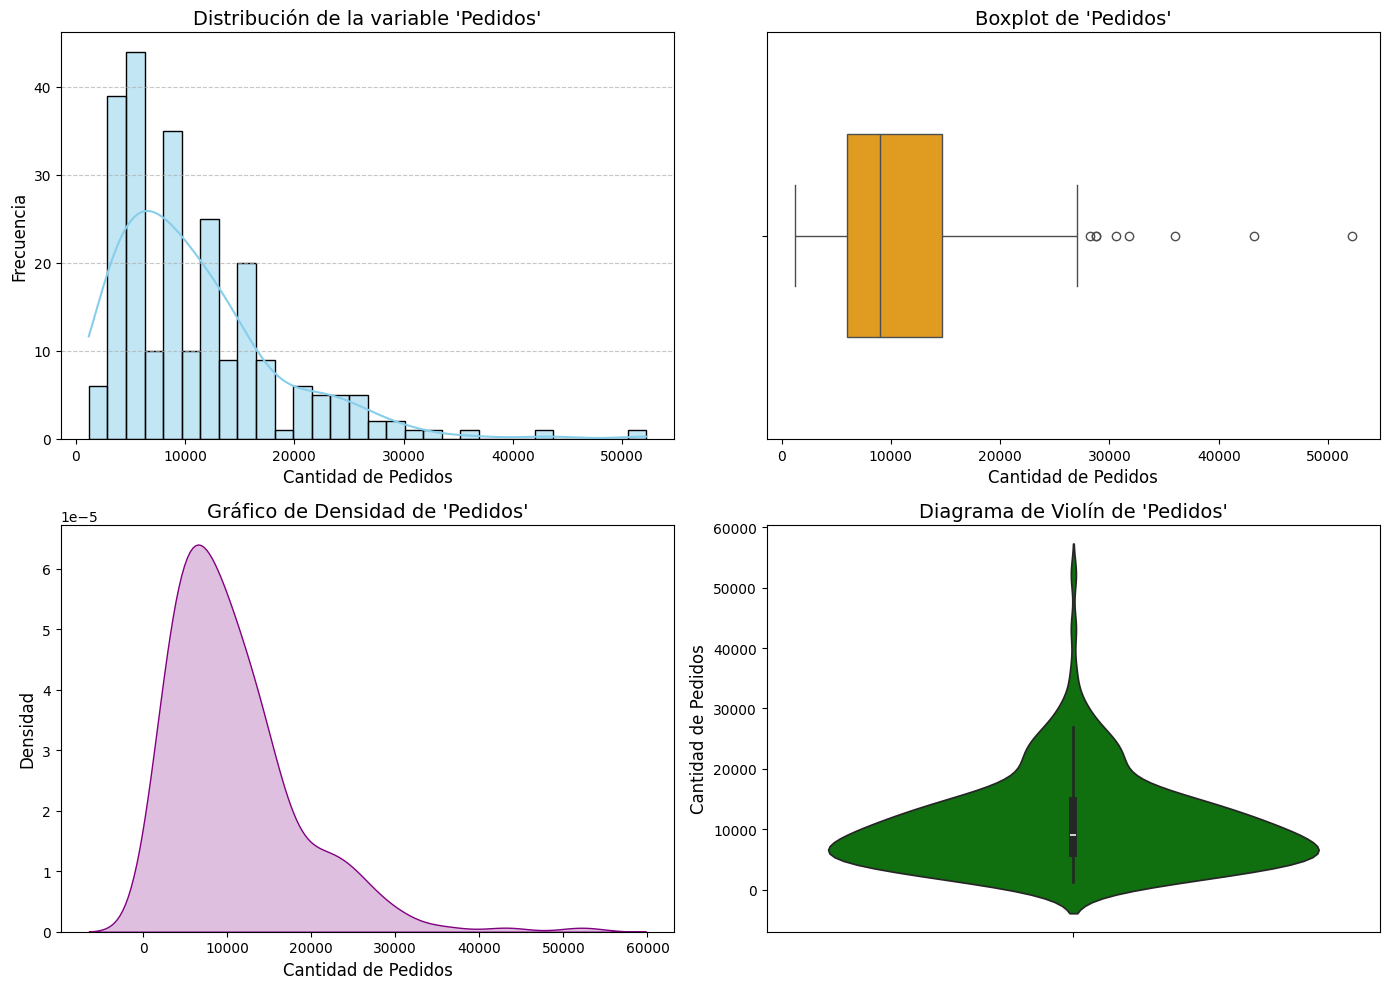

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de la variable 'Pedidos':\n")
display(df["Pedidos"].describe().to_frame())

# Cálculo de moda
mode_pedidos = df["Pedidos"].mode().values[0]
print(f"\nModa de 'Pedidos': {mode_pedidos}")

# Cálculo de asimetría y curtosis
skewness = skew(df["Pedidos"])
kurt = kurtosis(df["Pedidos"])
print(f"\nAsimetría (Skewness): {skewness:.2f}")
print(f"Curtosis: {kurt:.2f}")

# Detección de valores atípicos usando el método del rango intercuartil (IQR)
Q1 = df["Pedidos"].quantile(0.25)
Q3 = df["Pedidos"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Pedidos"] < (Q1 - 1.5 * IQR)) | (df["Pedidos"] > (Q3 + 1.5 * IQR))]
print(f"\nNúmero de valores atípicos detectados: {outliers.shape[0]}")

# Gráficas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma
sns.histplot(
    df["Pedidos"], bins=30, kde=True, color="skyblue", edgecolor="black", ax=axs[0, 0]
)
axs[0, 0].set_title("Distribución de la variable 'Pedidos'", fontsize=14)
axs[0, 0].set_xlabel("Cantidad de Pedidos", fontsize=12)
axs[0, 0].set_ylabel("Frecuencia", fontsize=12)
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

# Boxplot para identificar valores atípicos
sns.boxplot(x=df["Pedidos"], color="orange", width=0.5, ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de 'Pedidos'", fontsize=14)
axs[0, 1].set_xlabel("Cantidad de Pedidos", fontsize=12)

# Gráfico de densidad (KDE)
sns.kdeplot(df["Pedidos"], fill=True, color="purple", ax=axs[1, 0])
axs[1, 0].set_title("Gráfico de Densidad de 'Pedidos'", fontsize=14)
axs[1, 0].set_xlabel("Cantidad de Pedidos", fontsize=12)
axs[1, 0].set_ylabel("Densidad", fontsize=12)

# Diagrama de violín
sns.violinplot(y=df["Pedidos"], color="green", ax=axs[1, 1])
axs[1, 1].set_title("Diagrama de Violín de 'Pedidos'", fontsize=14)
axs[1, 1].set_ylabel("Cantidad de Pedidos", fontsize=12)

plt.tight_layout()
plt.show()

## INTERPRETACIÓN DE RESULTADOS

Interpretación de Resultados del Análisis Univariado de "Pedidos"
1. Análisis Estadístico

*   Promedio de pedidos: 10,843
*   Mediana (percentil 50%): 9,000
*   Moda: 6,000
*   Rango intercuartil (IQR): 6,700 (Q3 - Q1 = 14,700 - 6,000)
*   Mínimo y máximo: 1,200 y 52,200 respectivamente


El promedio de pedidos (10,843) es mayor que la mediana (9,000), lo que indica que hay valores extremos altos que están influyendo en la media. Además, la moda es 6,000, lo que sugiere que este valor es el más frecuente en los datos.

2. Análisis de Distribución

Teniendo en cuenta el coeficiente de asimetría:

*   ≈ 0 → Distribución simétrica (normal).
*   Entre -0.5 y 0.5 → Aproximadamente simétrica.
*   Entre -1 y -0.5 o entre 0.5 y 1 → Moderadamente asimétrica.
*   Menor a -1 o mayor a 1 → Fuertemente asimétrica.

Y que:

*   Si el coeficiente es mayor a 0, la distribución es asimétrica a la derecha.
*  Si el coeficiente es menor a 0, la distribución es asimétrica a la izquierda.
*  Si el coeficiente es igual a 0, la distribución es simétrica.


El valor obtenido de Asimetría (Skewness): 1.68 → significa que la distribución esta sesgada positivamente (cola hacia la derecha).


Por otro lado, teniendo en cuenta que la curtosis mide cuántos valores extremos tiene una distribución en comparación con la normal y que:

* ≈ 3 → Distribución mesocúrtica (normal).
* < 3 → Distribución platicúrtica (achatada, pocos valores extremos).
* > 3 → Distribución leptocúrtica (picos altos y muchos valores extremos).

La Curtosis obtenida: 4.40 → Significa: Distribución leptocúrtica (valores extremos más pronunciados que una distribución normal).

El coeficiente de asimetría positivo indica que hay más pedidos bajos que pedidos muy altos, pero existen valores extremos que elevan el promedio. La curtosis mayor a 3 indica que hay una mayor concentración de datos alrededor de la media, pero también más valores extremos.

3. Visualización y Valores Atípicos
Histograma y KDE: La distribución muestra un pico en valores más bajos, con una larga cola derecha.
Boxplot y Diagrama de Violín: Se identifican valores atípicos por encima de 30,000, lo que refuerza la presencia de outliers en la parte superior de la distribución.
Cantidad de valores atípicos: Se observan varios puntos fuera del rango intercuartil, lo que puede impactar la predicción de demanda si no se tratan adecuadamente.


# **CONCLUSIONS Y RECOMENDACIONES ANALISIS UNIVARIADO**

Los valores atípicos podrían corresponder a pedidos excepcionales (picos en la demanda). Es recomendable analizarlos en detalle para determinar si deben ser tratados o eliminados en el modelado.
La alta dispersión en los pedidos indica variabilidad en la demanda, lo que puede complicar la planificación y abastecimiento.
El sesgo positivo indica que los modelos predictivos podrían beneficiarse de transformaciones (como logaritmos) para estabilizar la distribución y mejorar la precisión.
Se sugiere analizar correlaciones con otras variables como festividades, cercanía a quincena y temporada escolar para entender qué factores pueden estar afectando los pedidos.

Próximos pasos:

*   Realizar un análisis bivariado con otras variables relevantes.
*   Aplicar técnicas de tratamiento de valores atípicos.
*   Evaluar transformaciones para reducir la asimetría de la distribución.





# **ANÁLISIS BIVARIADO**

<div style="text-align: justify;">

</div>

In [ ]:
# PRIMERO HAREMOS UN ANÁLISIS DE TODAS LAS VARIABLES DEL DATASET CON EL FIN DE DETERMINAR LA VARIABLE PREDICTORA QUE SE RELACIONA MÁS CON LA VARIABLE OBJETIVO

import gdown

file_id = "1vlp-koxXiWZvNfK7BZKfhUlmNDdWlQE1"
url = f"https://drive.google.com/uc?id={file_id}"
output = "data.csv"

gdown.download(url, output, quiet=False)

# Leer el archivo como DataFrame
df = pd.read_excel(output)
print(df.head())

# Hacemos un merge para combinar calendario con la data de SKU1
calendario.rename(columns={"Fecha": "Fe.prefer.entrega"}, inplace=True)
df = df.merge(calendario, on="Fe.prefer.entrega", how="left")
df = pd.get_dummies(df, columns=["Day_of_the_Week"], prefix="_", drop_first=True)
df = df.astype({col: "int" for col in df.select_dtypes(include="bool").columns})
df = df[df["SKU"] == "SKU7"]
df.head()

# Convertir columnas booleanas a binario (0 y 1)
cols_booleanas = ["Es festivo", "Cerca de quincena", "Temporada Escolar"]
df[cols_booleanas] = df[cols_booleanas].astype(int)

df.to_csv("dataset_transformado.csv", index=False)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1vlp-koxXiWZvNfK7BZKfhUlmNDdWlQE1
To: /content/data.csv
100%|██████████| 141k/141k [00:00<00:00, 36.0MB/s]


    Cliente Fe.prefer.entrega Day_of_the_Week  Pedidos  Sell_In  \
0  D1 S.A.S        2024-06-01        Saturday     9192     9192   
1  D1 S.A.S        2024-06-01        Saturday     3600     3600   
2  D1 S.A.S        2024-06-02          Sunday     7128     7128   
3  D1 S.A.S        2024-06-02          Sunday    11040    11040   
4  D1 S.A.S        2024-06-02          Sunday     1800     1800   

   Sell_in_on_time  CEDIS   SKU  Mes_Año  Tiendas  \
0                0      3  SKU1    62024      552   
1                0      3  SKU2    62024      552   
2                0      3  SKU1    62024      552   
3                0      3  SKU5    62024     1208   
4                0      4  SKU6    62024     1208   

   Promedio_dia_Sell_Out_Cliente  Sell_in_rezago  porcentaje_on_time  
0                    9542.101296            9192                 0.0  
1                    1959.285820            3600                 0.0  
2                    9542.101296            7128                 

Cliente Fe.prefer.entrega  Pedidos  Sell_In  Sell_in_on_time  CEDIS  \
14  D1 S.A.S        2024-06-03     1200     1200                0      2   
28  D1 S.A.S        2024-06-05     6000     6000             6000      1   
43  D1 S.A.S        2024-06-07    24000    24000            18000      2   
51  D1 S.A.S        2024-06-08     9000     9000             9000      2   
59  D1 S.A.S        2024-06-09     6000     6000                0      2   

     SKU  Mes_Año  Tiendas  Promedio_dia_Sell_Out_Cliente  ...  \
14  SKU7    62024      552                    6004.261887  ...   
28  SKU7    62024      552                    6004.261887  ...   
43  SKU7    62024      552                    6004.261887  ...   
51  SKU7    62024      552                    6004.261887  ...   
59  SKU7    62024      552                    6004.261887  ...   

    porcentaje_on_time  Es festivo  Cerca de quincena  Temporada Escolar  \
14                0.00           1                  0                  1   
28                1.00           0                  0                  1   
43                0.75           0                  0                  1   
51                1.00           0                  0                  1   
59                0.00           0                  0                  1   

    __Monday  __Saturday  __Sunday  __Thursday  __Tuesday  __Wednesday  
14         1           0         0           0          0            0  
28         0           0         0           0          0            1  
43         0           0         0           0          0            0  
51         0           1         0           0          0            0  
59         0           0         1           0          0            0  

[5 rows x 21 columns]

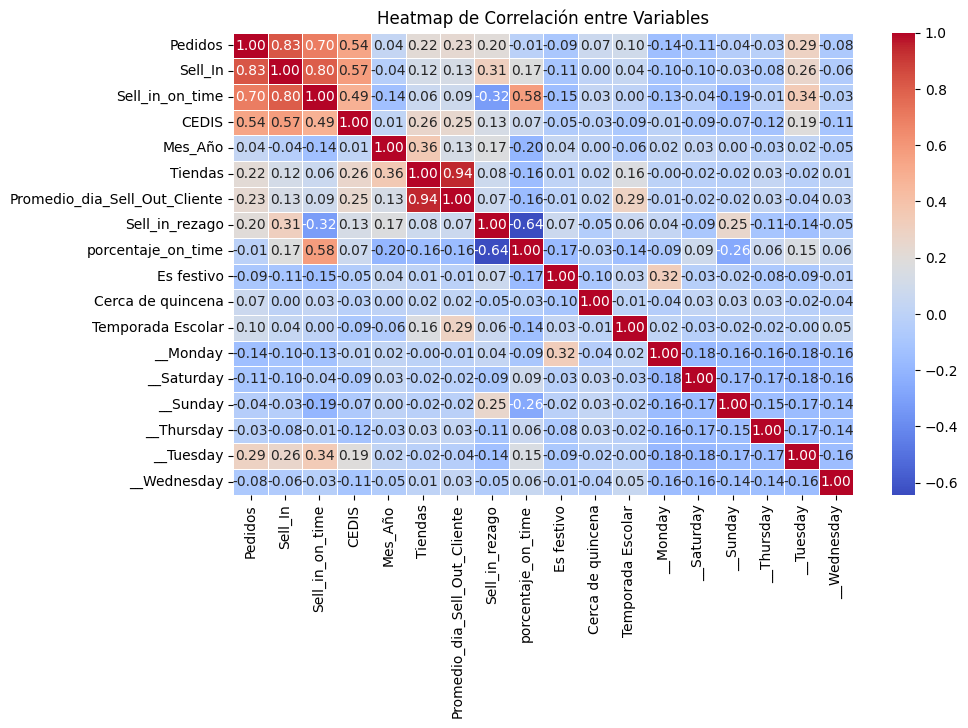

In [ ]:
# CORRELACIÓN DE PEARSON
# Matriz de correlación con todas las variables numéricas
df_numeric = df.select_dtypes(include="number")
correlation_matrix = df_numeric.corr()

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

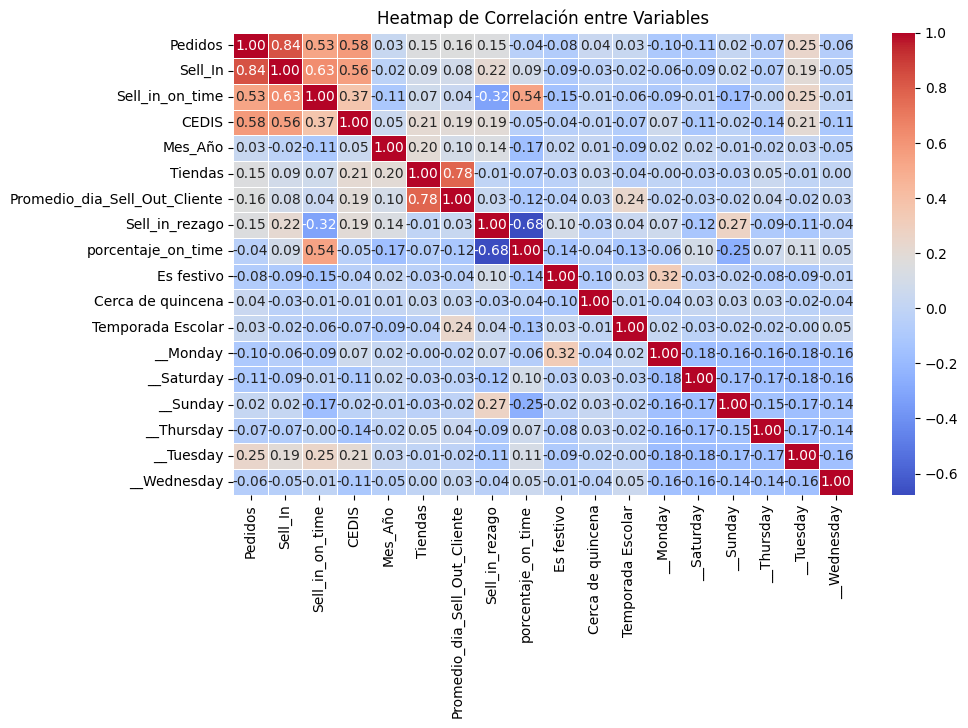

In [ ]:
# CORRELACIÓN DE KENDALL
# Matriz de correlación con todas las variables numéricas
df_numeric = df.select_dtypes(include="number")
correlation_matrix = df_numeric.corr(method="kendall")

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

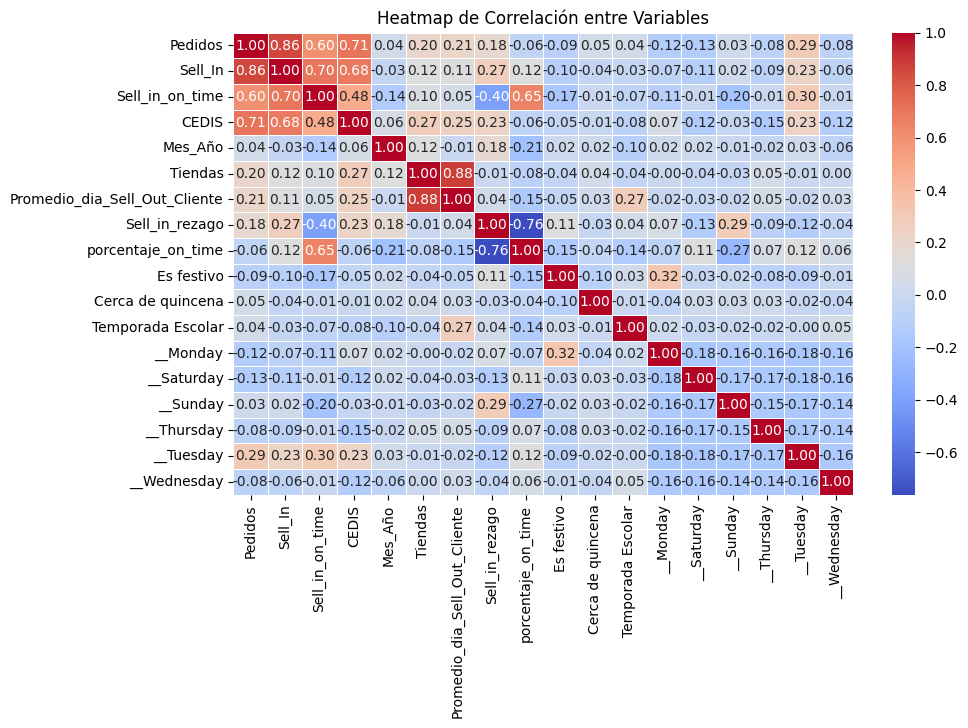

In [ ]:
# CORRELACIÓN DE SPEARMAN
# Matriz de correlación con todas las variables numéricas
df_numeric = df.select_dtypes(include="number")
correlation_matrix = df_numeric.corr(method="spearman")

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

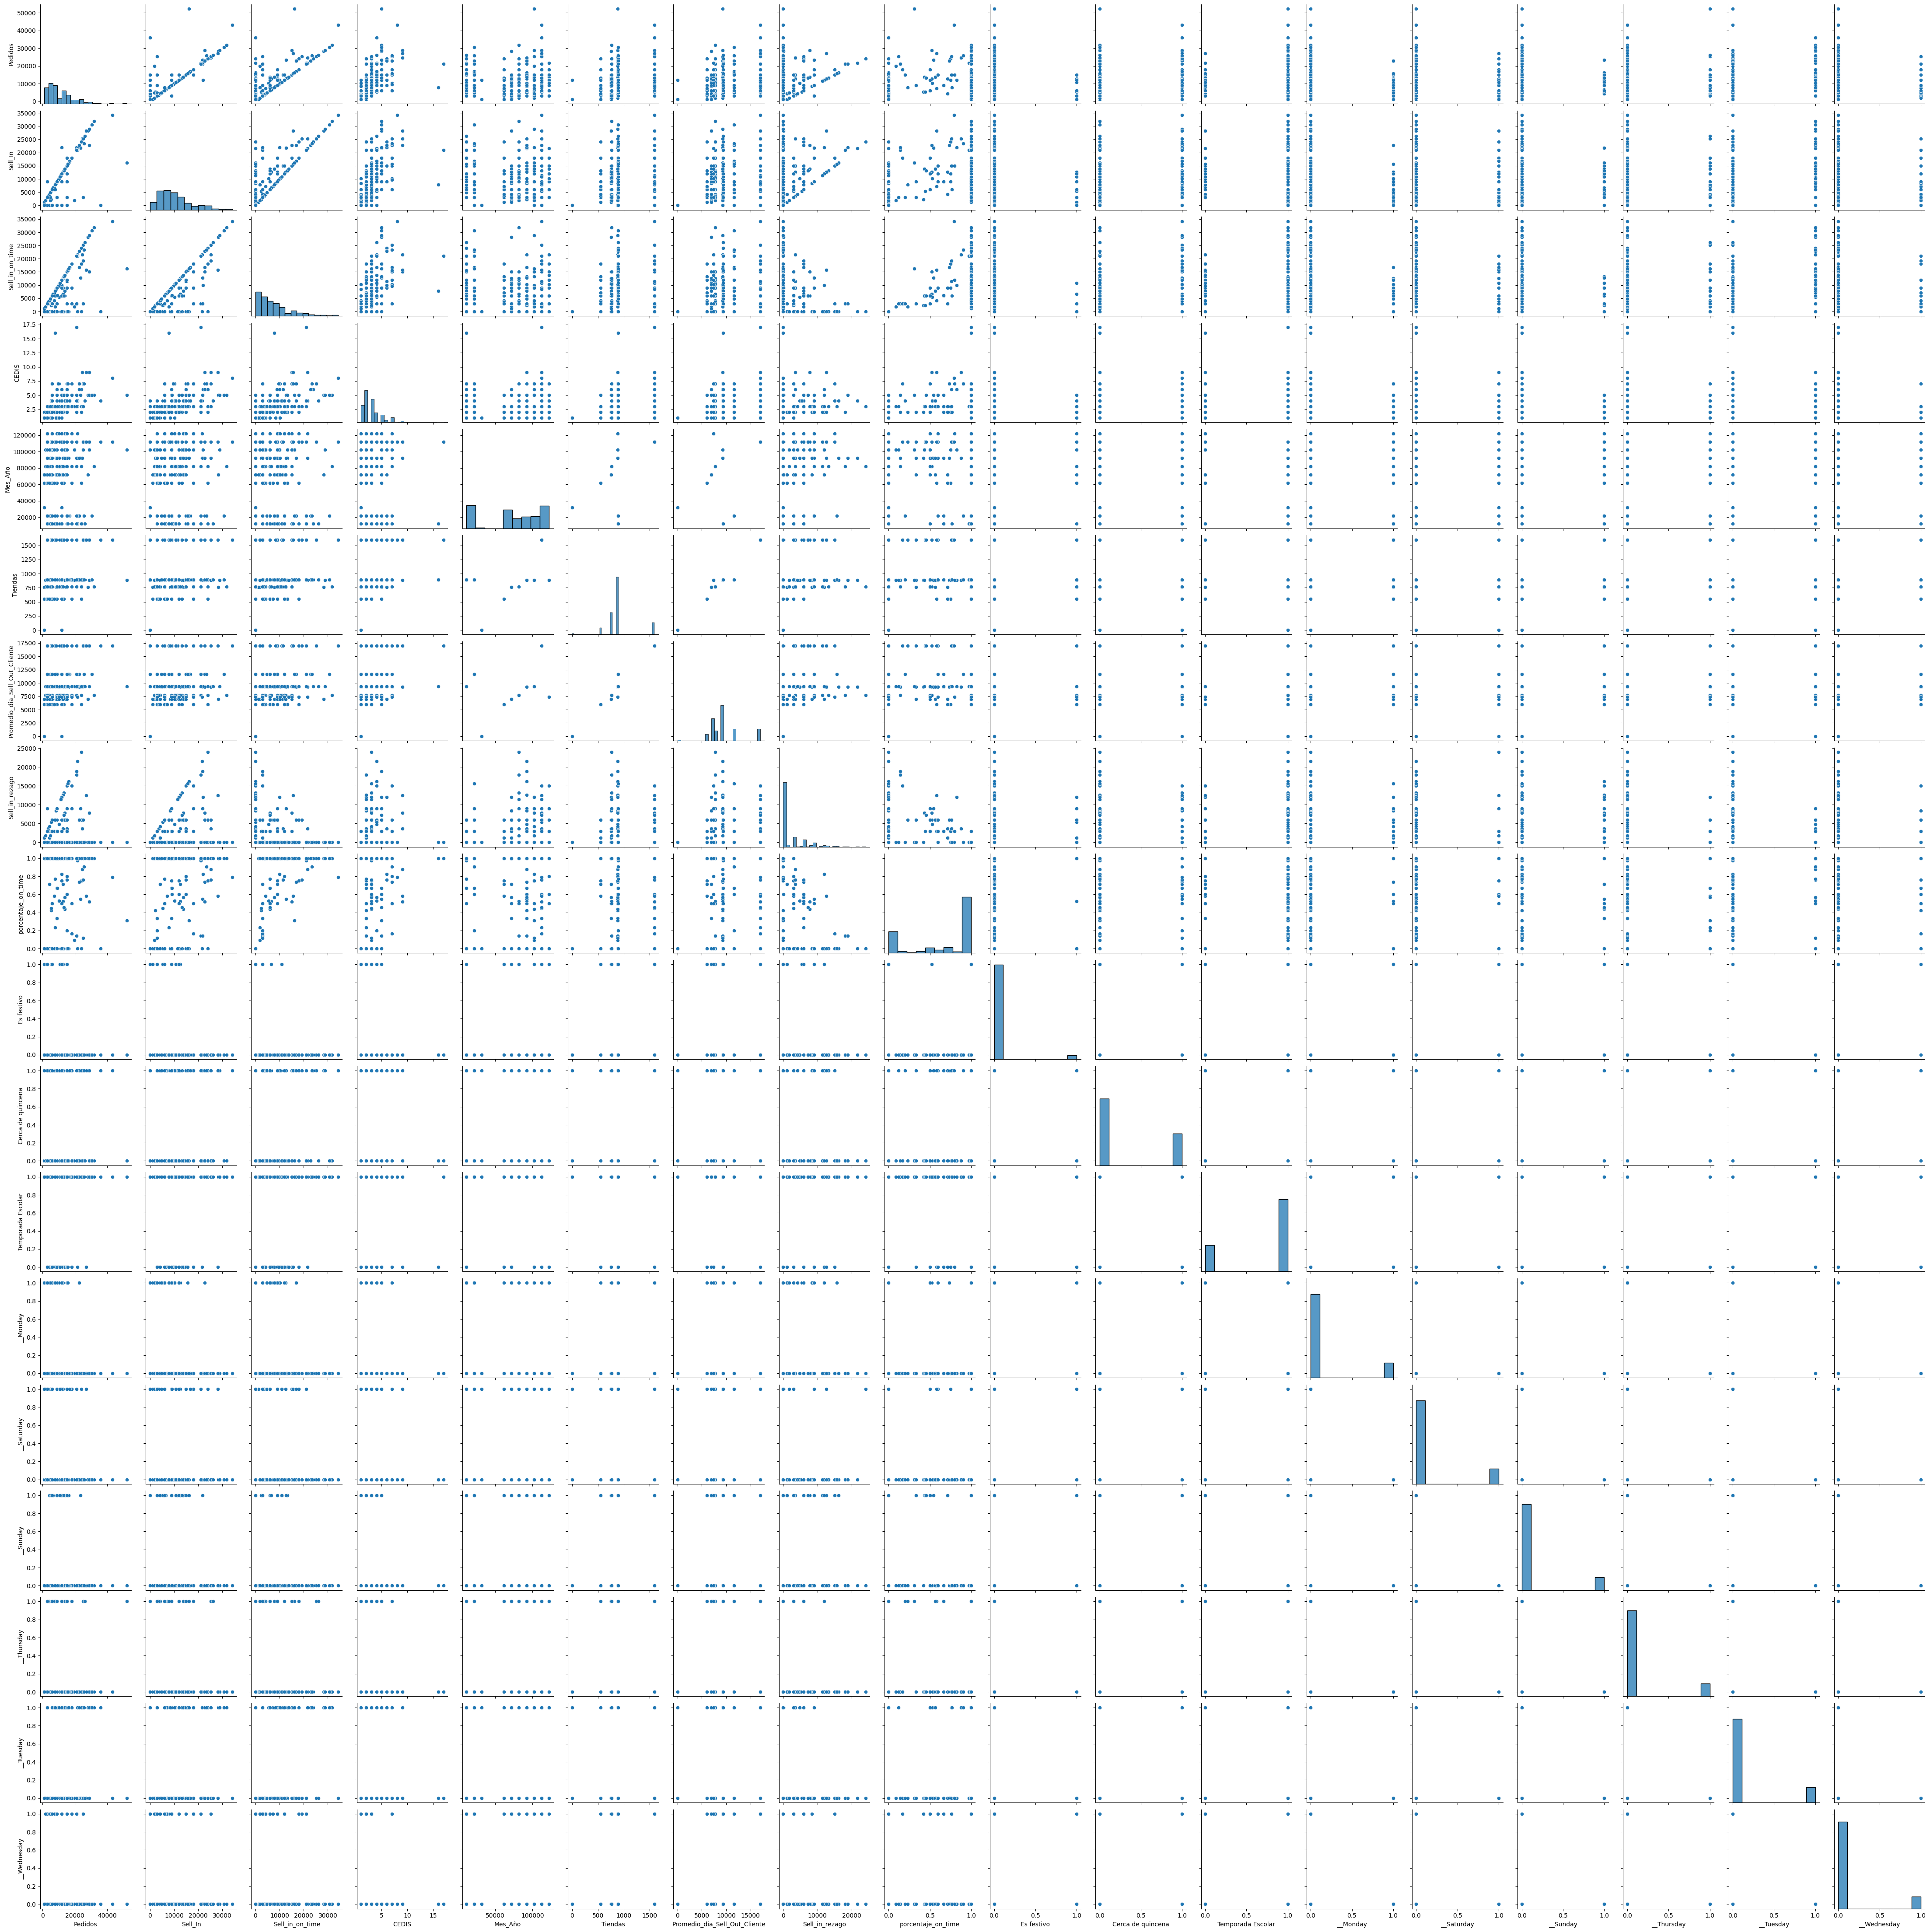

In [ ]:
# Pairplot de todas las variables numéricas
sns.pairplot(df_numeric)
plt.show()

In [ ]:
pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.2 MB/s eta 0:00:00


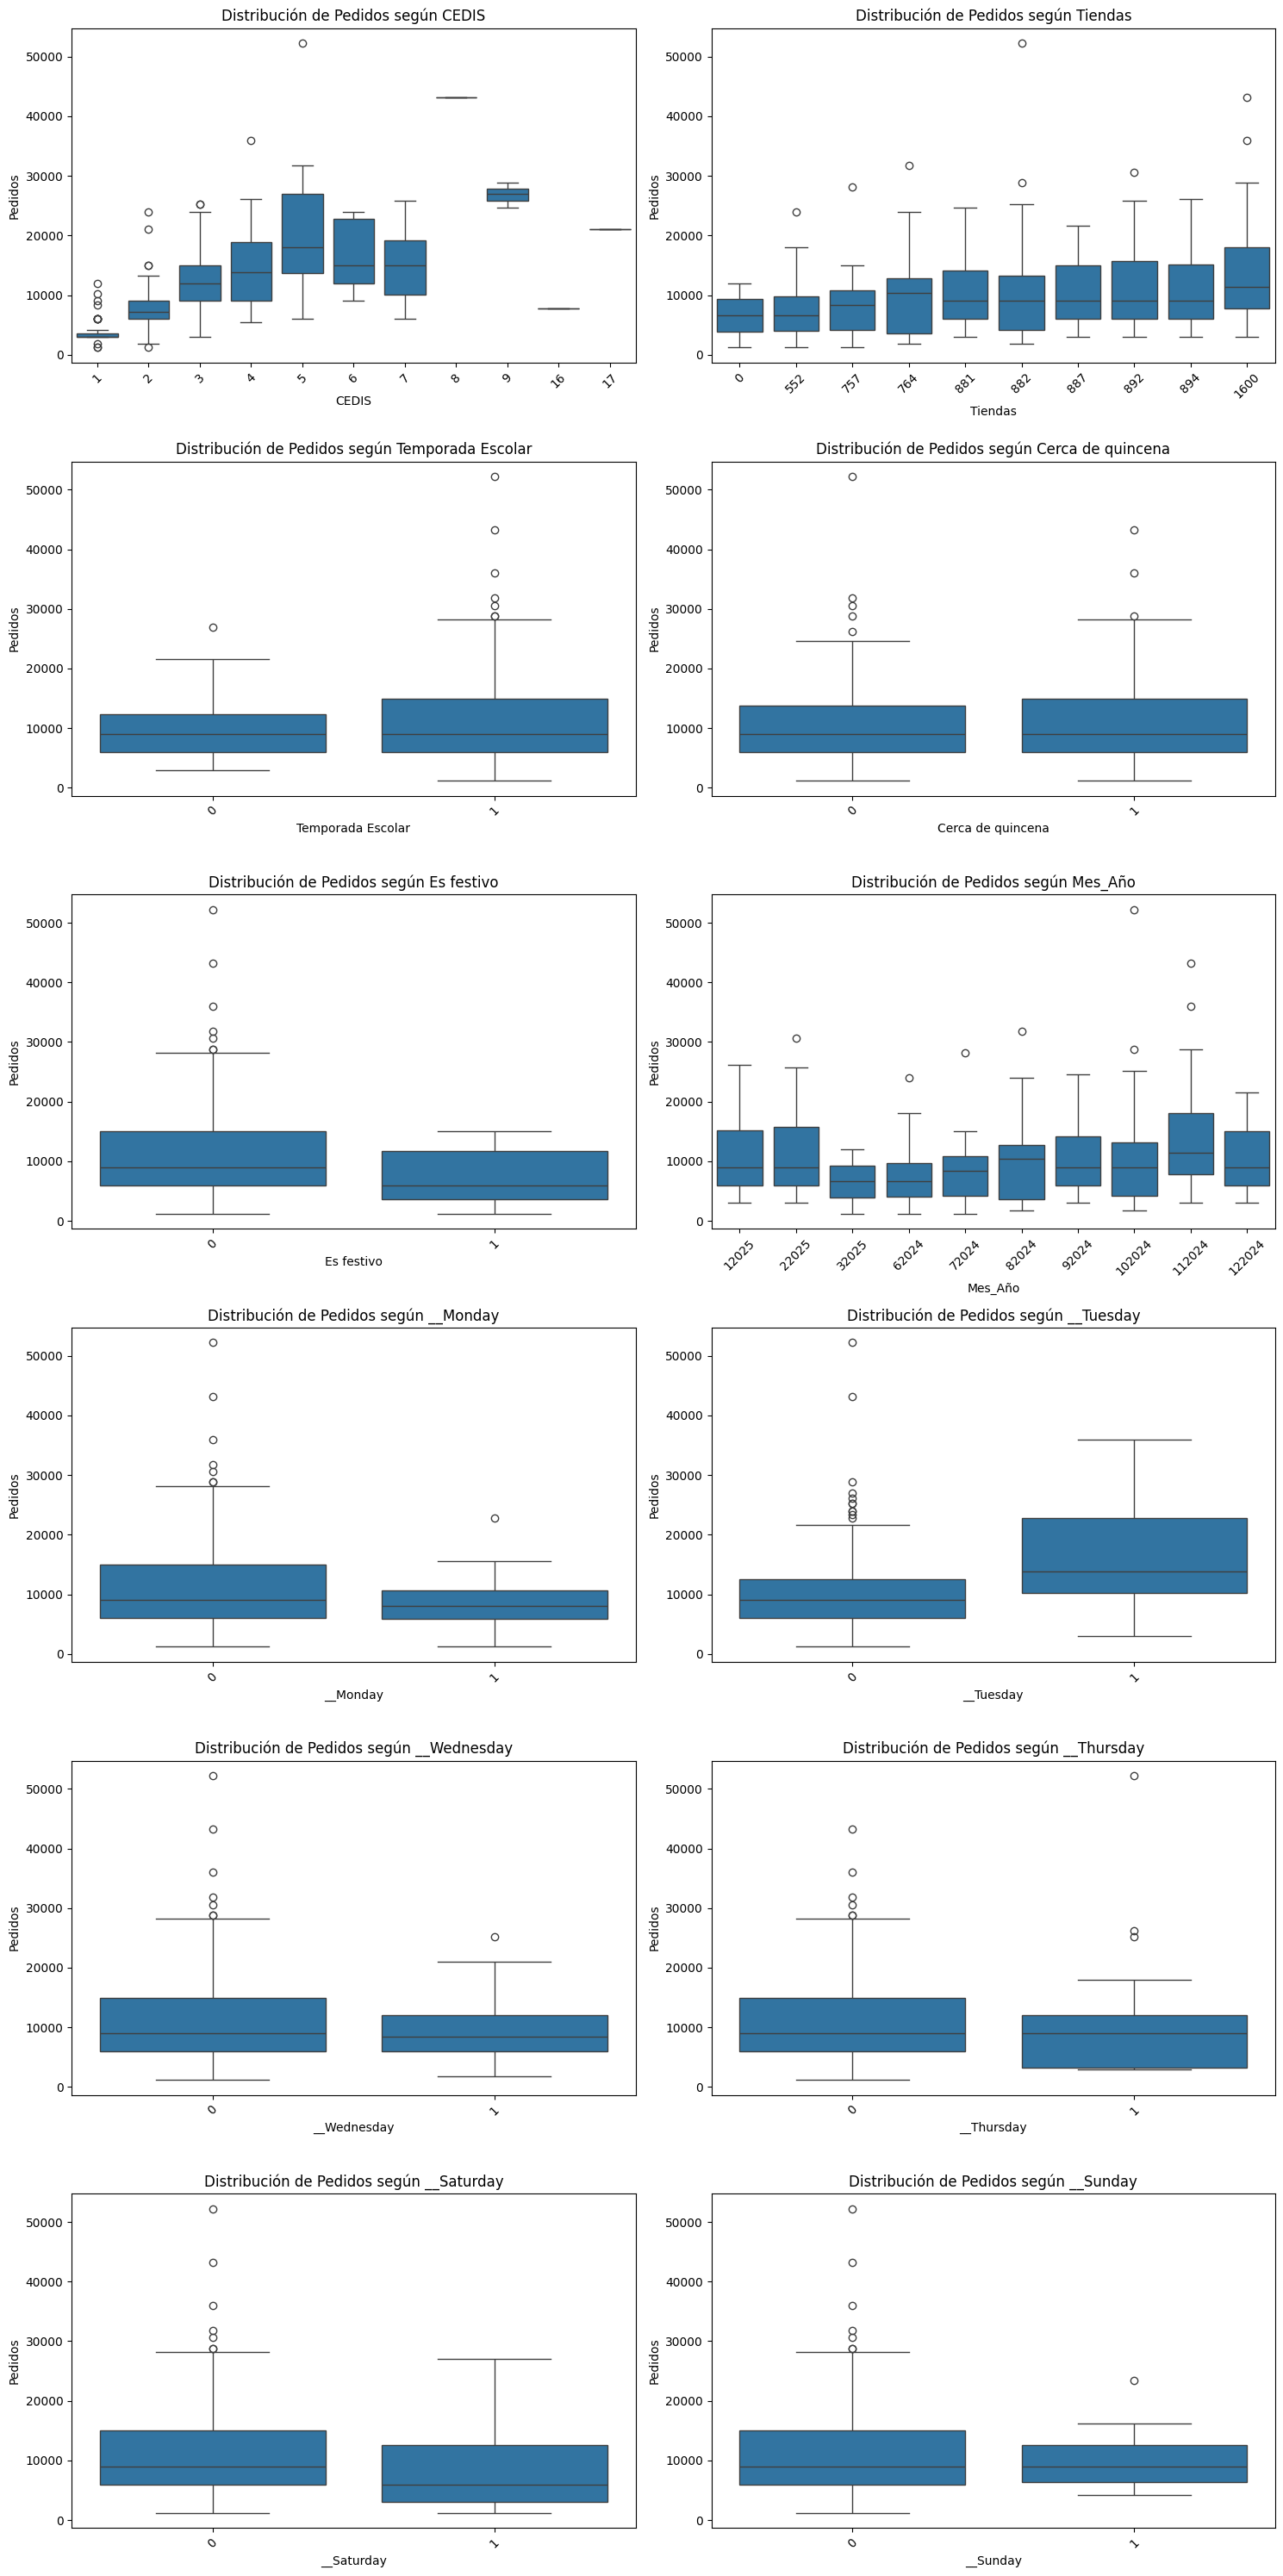

In [ ]:
# BOX PLOTS

# Variables categóricas a analizar con boxplots
categorical_vars = [
    "CEDIS",
    "Tiendas",
    "Temporada Escolar",
    "Cerca de quincena",
    "Es festivo",
    "Mes_Año",
    "__Monday",
    "__Tuesday",
    "__Wednesday",
    "__Thursday",
    "__Saturday",
    "__Sunday",
]

# Crear boxplots de cada variable categórica respecto a "Pedidos"
n_cols = 2  # Número de columnas en la visualización
n_rows = -(
    -len(categorical_vars) // n_cols
)  # Redondeo hacia arriba para obtener las filas necesarias

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Si hay solo una fila, convertir axs en una lista para evitar errores
if n_rows == 1:
    axs = [axs]

# Dibujar los boxplots
for i, var in enumerate(categorical_vars):
    row, col = divmod(i, n_cols)  # Obtener la posición en la cuadrícula
    sns.boxplot(x=df[var], y=df["Pedidos"], ax=axs[row][col])
    axs[row][col].set_title(f"Distribución de Pedidos según {var}")
    axs[row][col].set_xlabel(var)
    axs[row][col].set_ylabel("Pedidos")
    axs[row][col].tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X

plt.tight_layout()
plt.show()

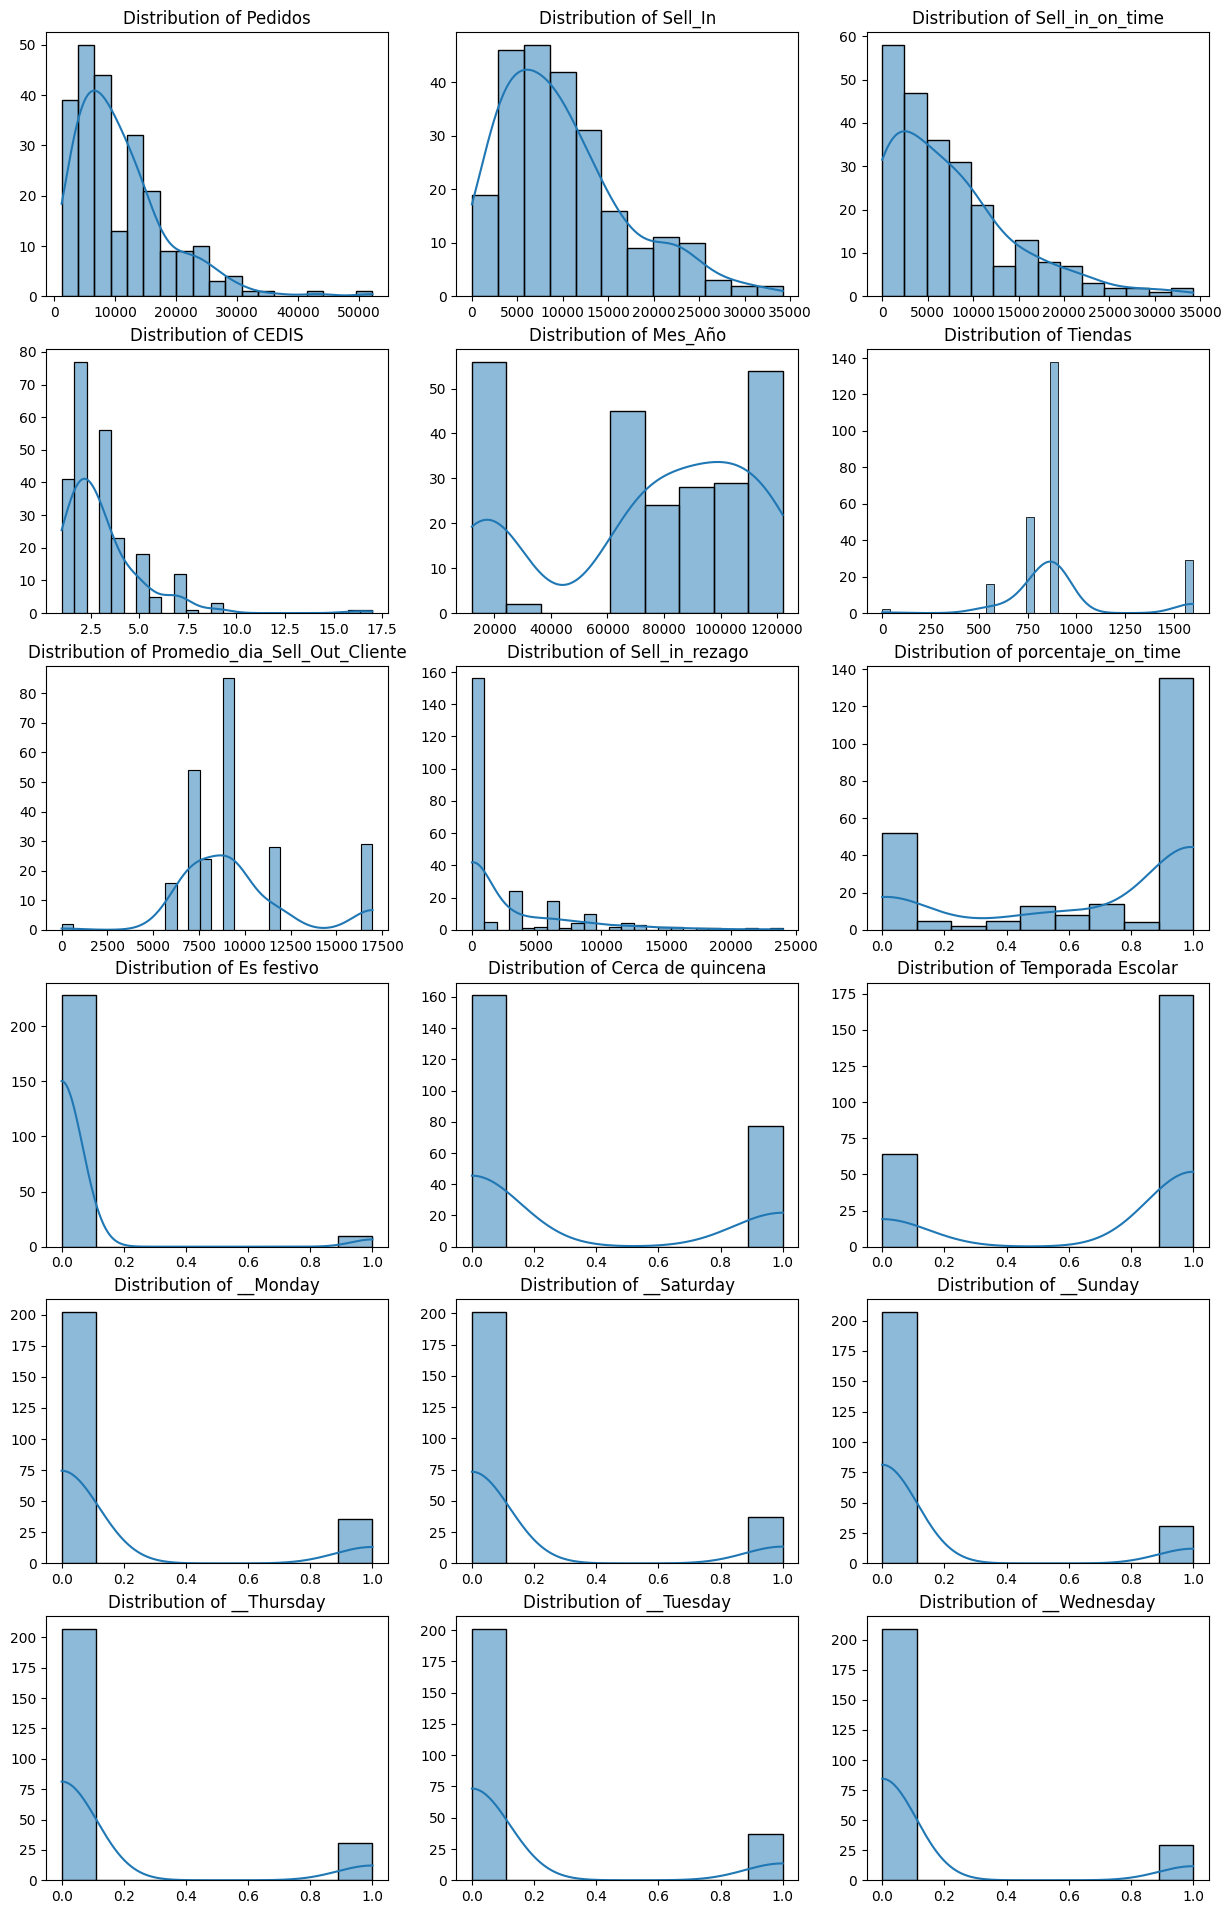

In [ ]:
# Distribuciones de todas las variables numéricas
n_cols = 3
n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.show()

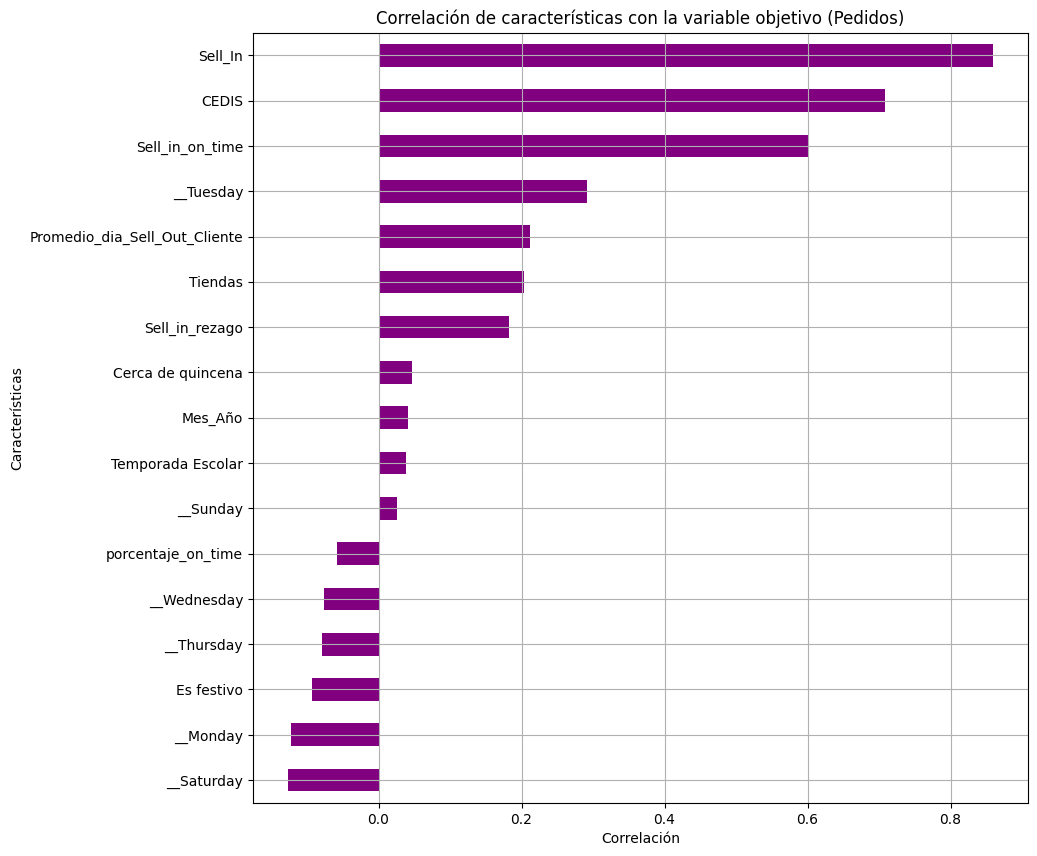

In [ ]:
# CORRELACIÓN DE PEARSON

# Análisis de correlación con la variable objetivo "Pedidos"
corr_target = correlation_matrix["Pedidos"].sort_values(ascending=True)
corr_target = corr_target.drop("Pedidos")

plt.figure(figsize=(10, 10))
corr_target.plot(kind="barh", color="purple")
plt.title("Correlación de características con la variable objetivo (Pedidos)")
plt.xlabel("Correlación")
plt.ylabel("Características")
plt.grid(True)
plt.show()

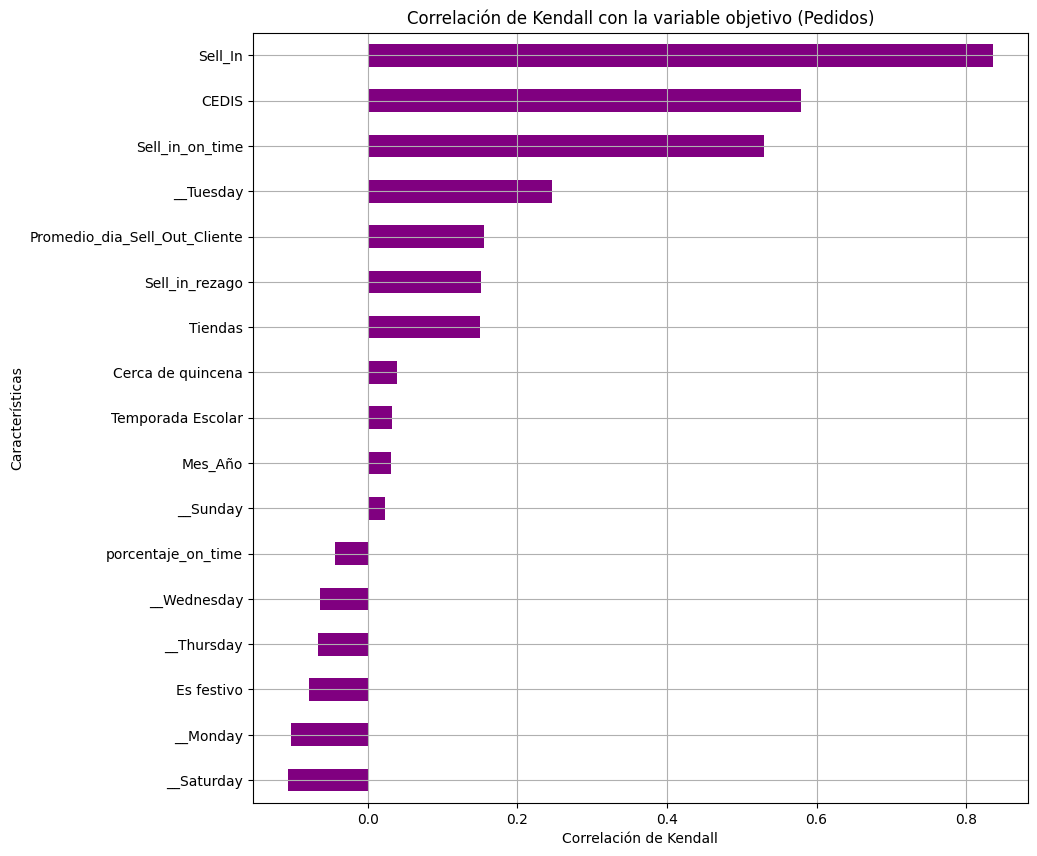

In [ ]:
# CORRELACIÓN DE KENDALL

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación de Kendall
correlation_matrix = df_numeric.corr(method="kendall")

# Obtén la correlación con la variable objetivo "Pedidos"
# y ordena los valores
corr_target = correlation_matrix["Pedidos"].sort_values(ascending=True)

# Elimina la correlación de "Pedidos" consigo misma
corr_target = corr_target.drop("Pedidos")

# Crea el gráfico de barras horizontales
plt.figure(figsize=(10, 10))
corr_target.plot(kind="barh", color="purple")
plt.title("Correlación de Kendall con la variable objetivo (Pedidos)")
plt.xlabel("Correlación de Kendall")
plt.ylabel("Características")
plt.grid(True)
plt.show()

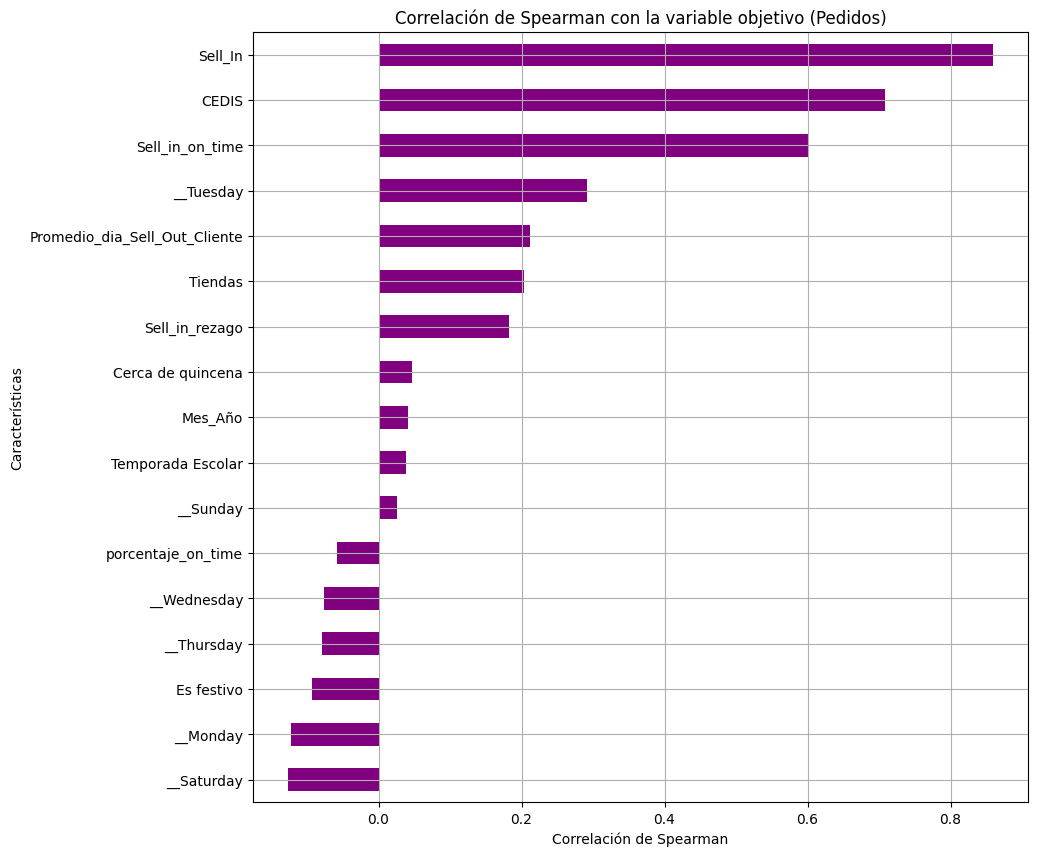

In [ ]:
# CORRELACIÓN DE SPEARMAN

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación de Kendall
correlation_matrix = df_numeric.corr(method="spearman")

# Obtén la correlación con la variable objetivo "Pedidos"
# y ordena los valores
corr_target = correlation_matrix["Pedidos"].sort_values(ascending=True)

# Elimina la correlación de "Pedidos" consigo misma
corr_target = corr_target.drop("Pedidos")

# Crea el gráfico de barras horizontales
plt.figure(figsize=(10, 10))
corr_target.plot(kind="barh", color="purple")
plt.title("Correlación de Spearman con la variable objetivo (Pedidos)")
plt.xlabel("Correlación de Spearman")
plt.ylabel("Características")
plt.grid(True)
plt.show()

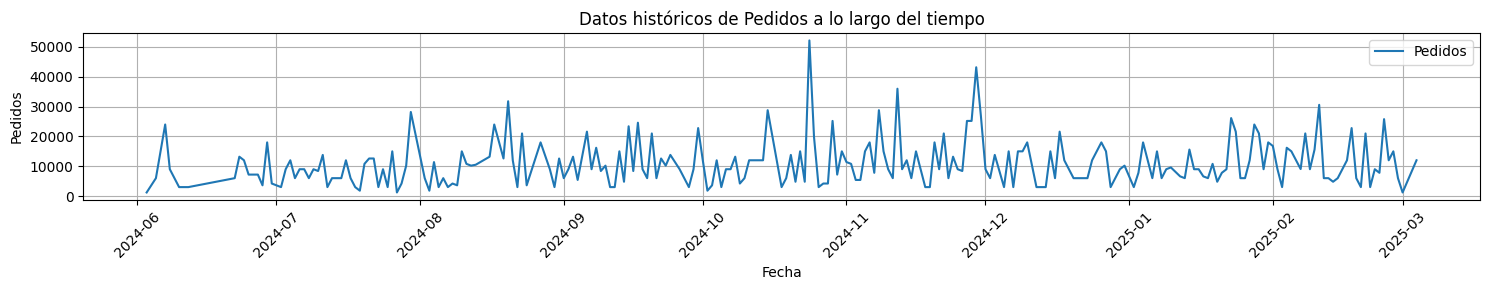

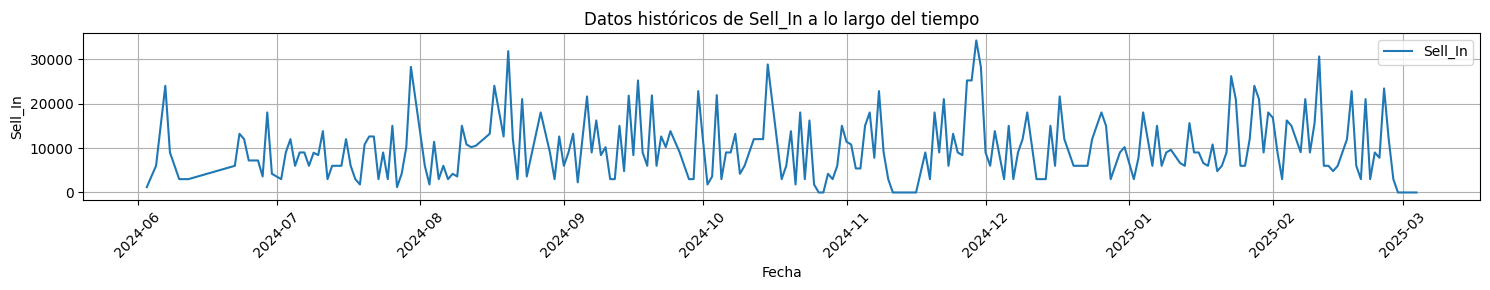

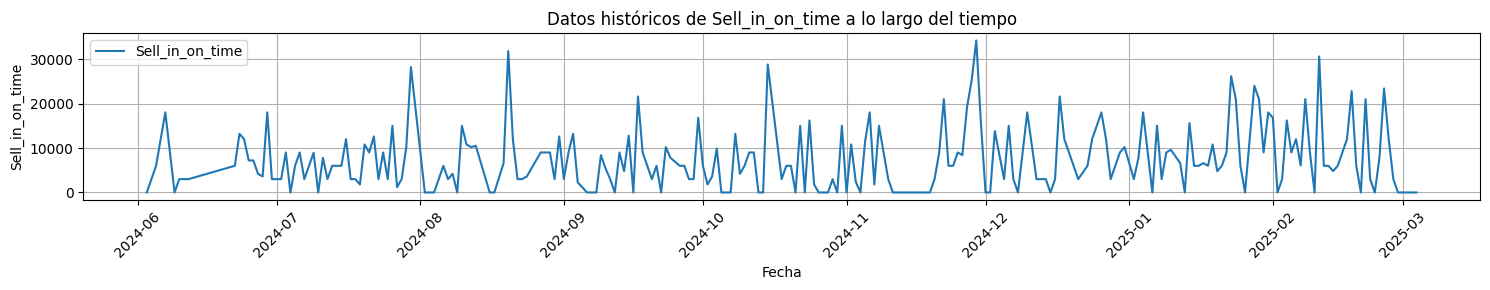

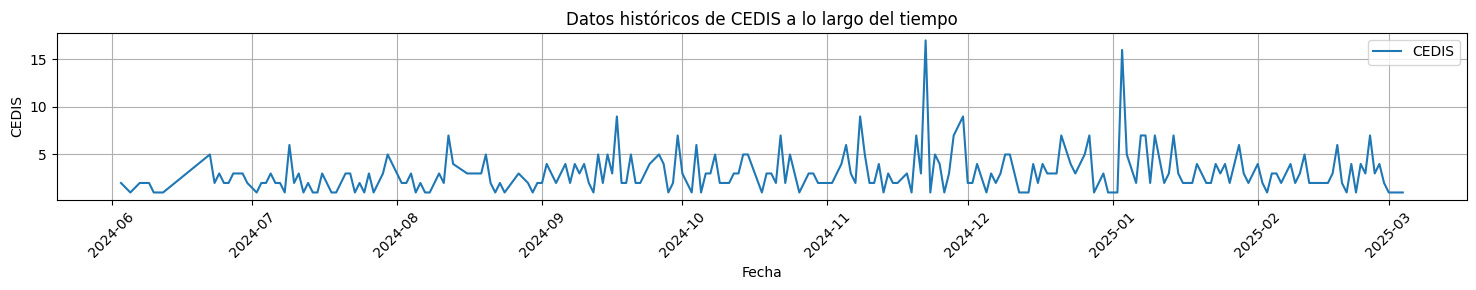

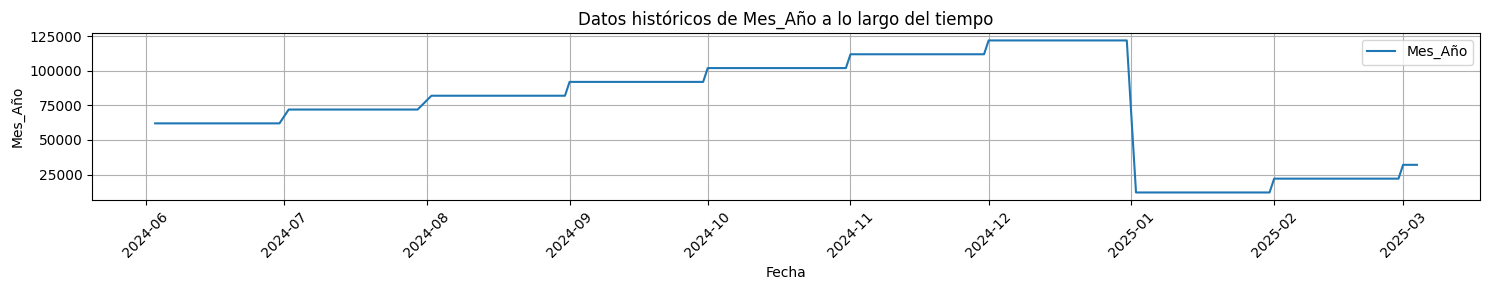

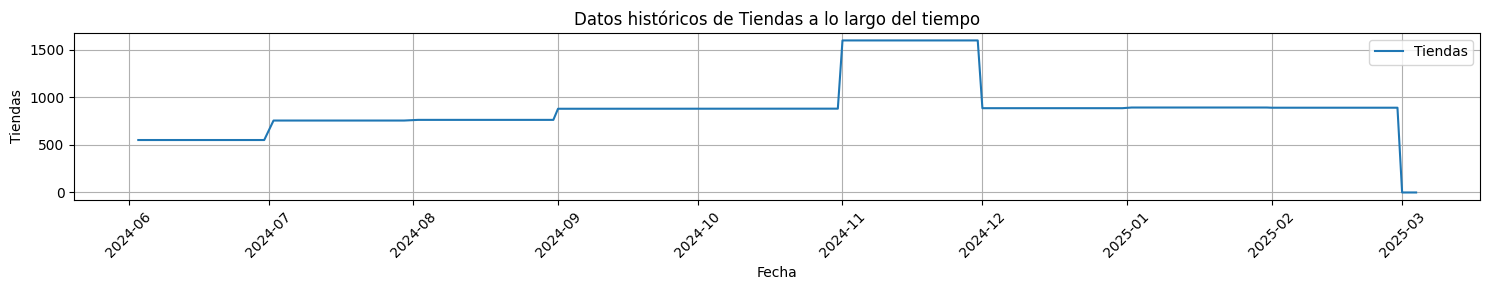

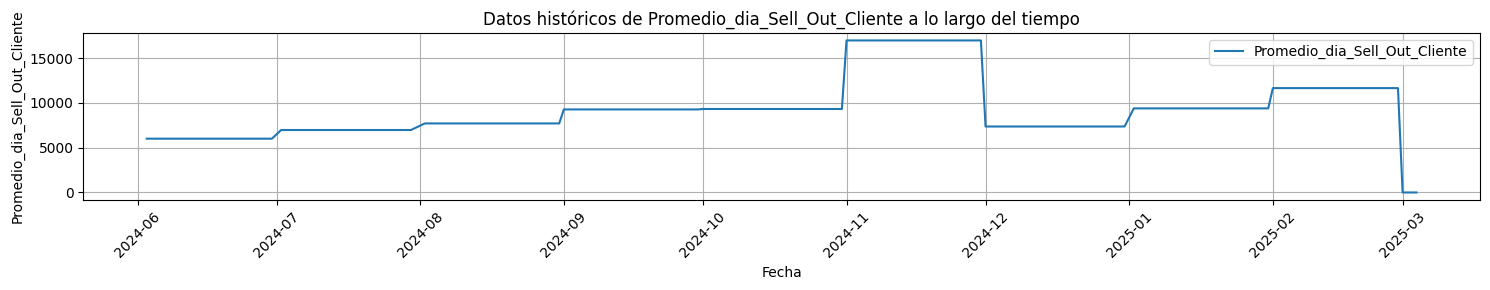

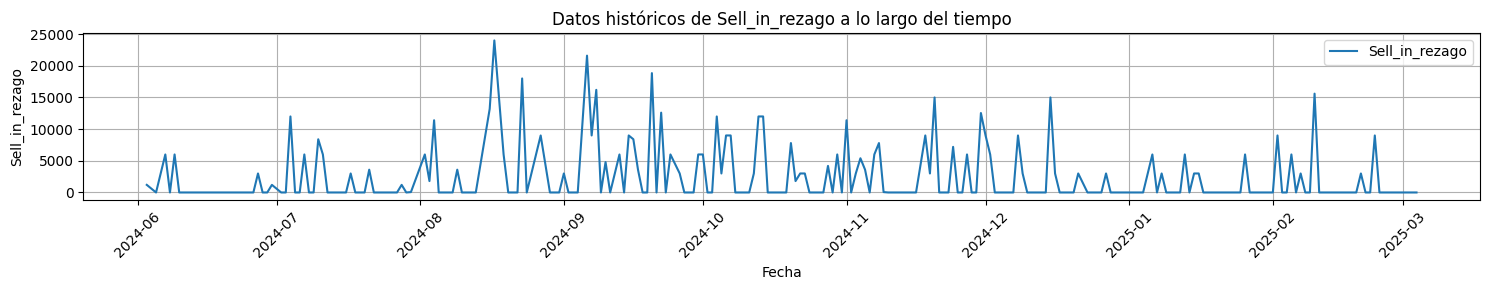

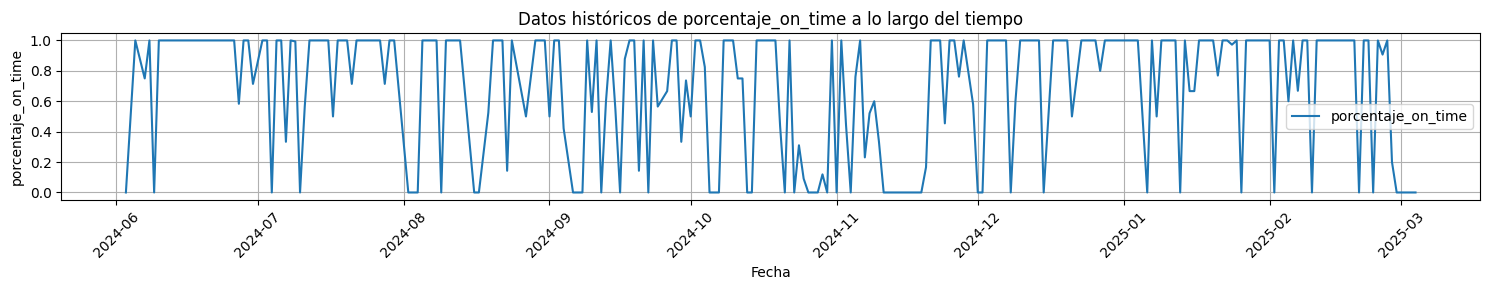

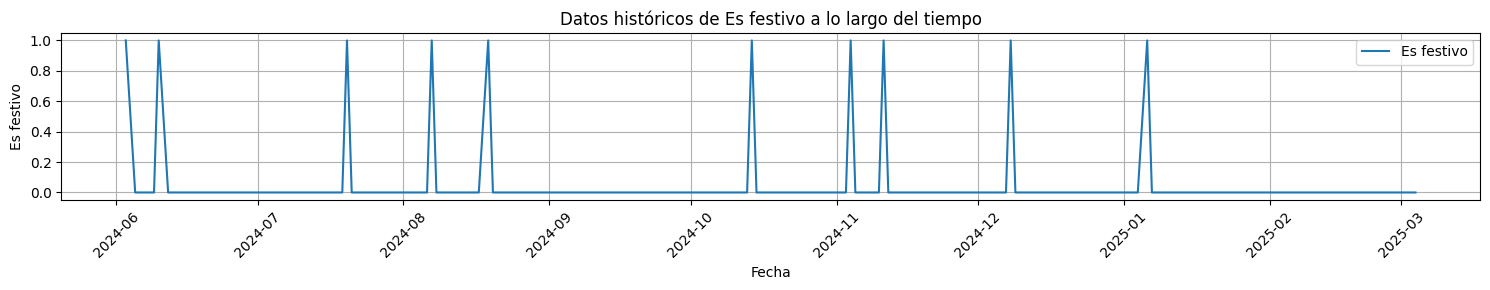

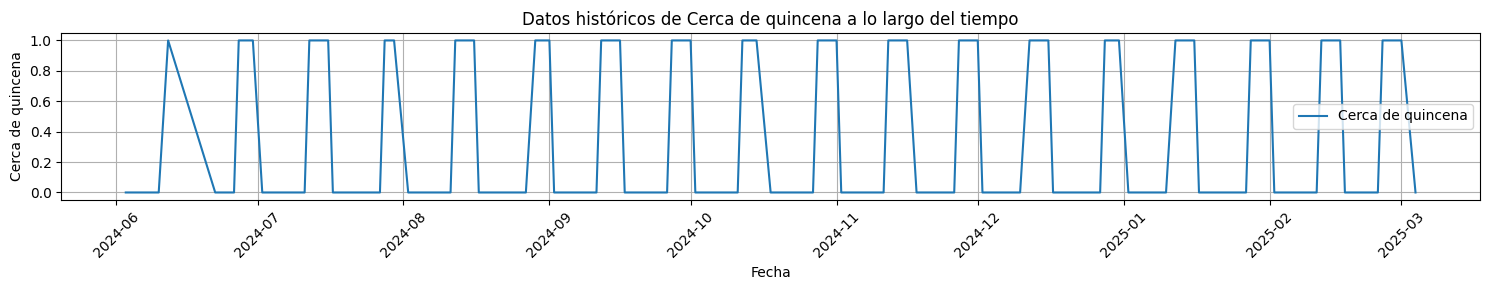

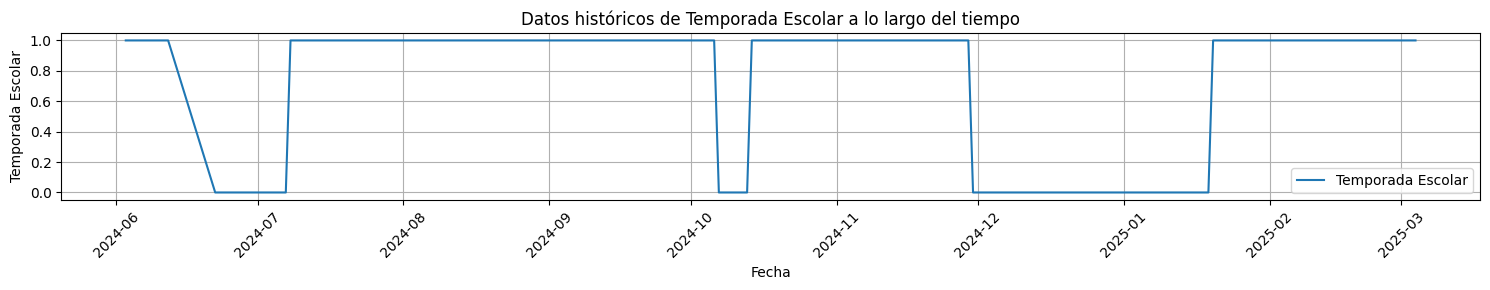

<ipython-input-20-66843084fdd8>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


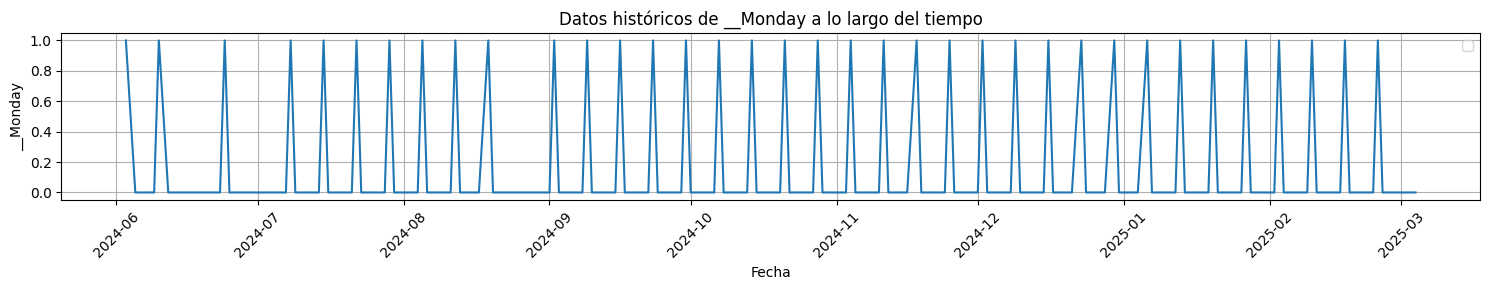

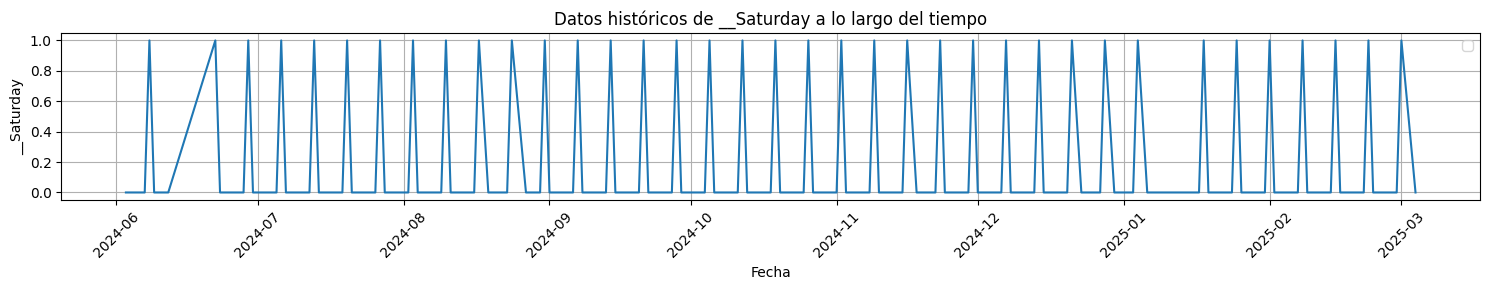

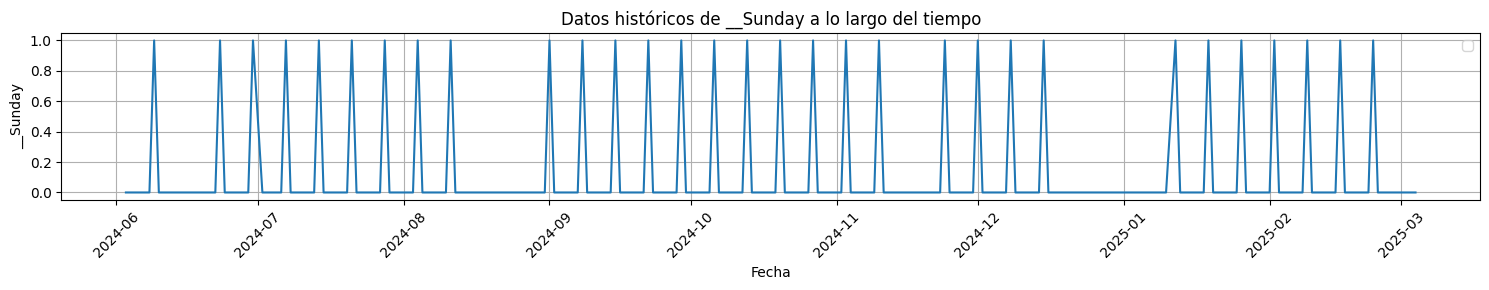

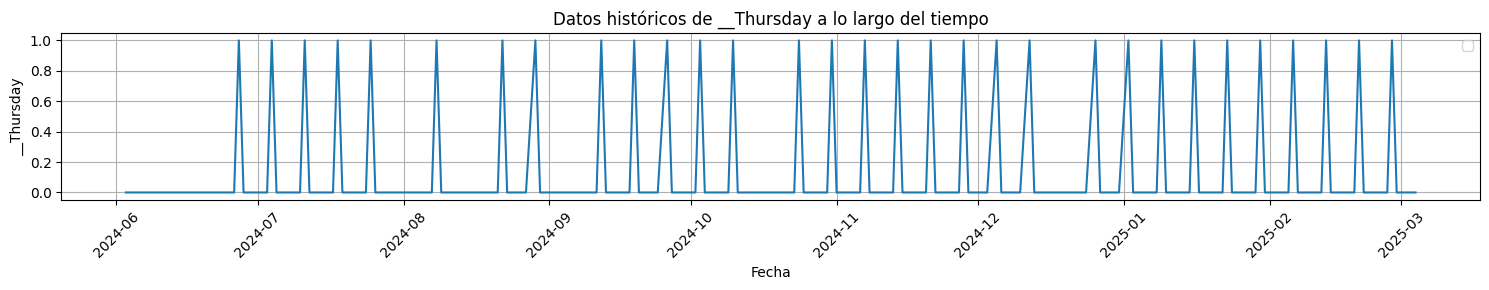

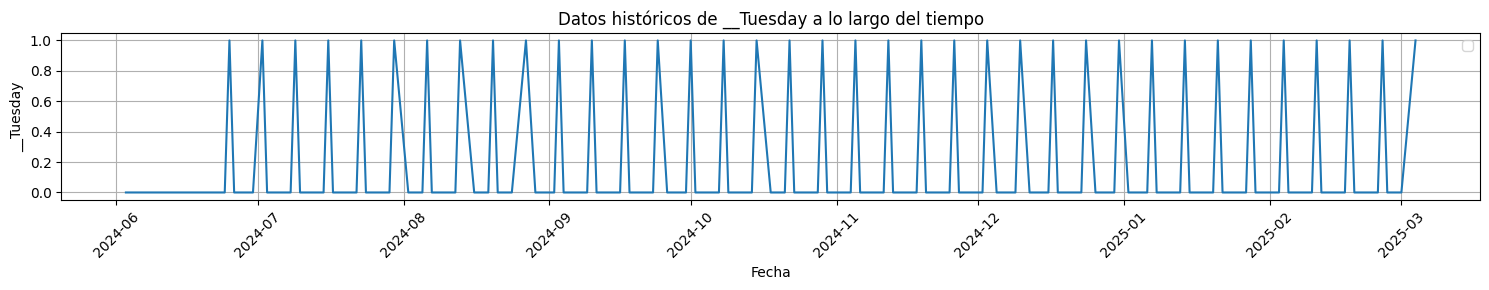

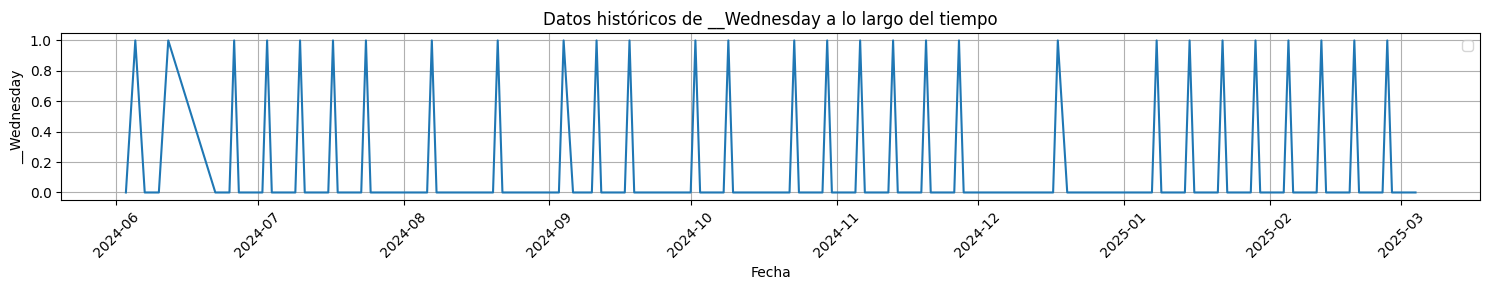

In [ ]:
# Series de tiempo de todas las variables numéricas
df2 = df.set_index("Fe.prefer.entrega")

for column in df2.select_dtypes(include="number").columns:
    plt.figure(figsize=(15, 3))  # Ajustar tamaño de figura según sea necesario
    plt.plot(df2.index, df2[column], label=column)
    plt.xlabel("Fecha")
    plt.ylabel(column)
    plt.title(f"Datos históricos de {column} a lo largo del tiempo")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.tight_layout()  # Ajustar diseño para evitar superposición de etiquetas
    plt.show()

In [ ]:
# Mostrar la matriz de correlación en tabla
display(correlation_matrix)

Pedidos   Sell_In  Sell_in_on_time     CEDIS  \
Pedidos                        1.000000  0.858913         0.602029  0.708507   
Sell_In                        0.858913  1.000000         0.701219  0.684996   
Sell_in_on_time                0.602029  0.701219         1.000000  0.478841   
CEDIS                          0.708507  0.684996         0.478841  1.000000   
Mes_Año                        0.041412 -0.033491        -0.141267  0.063910   
Tiendas                        0.203106  0.116100         0.095354  0.273392   
Promedio_dia_Sell_Out_Cliente  0.211735  0.110597         0.054165  0.248748   
Sell_in_rezago                 0.182976  0.265216        -0.402733  0.228571   
porcentaje_on_time            -0.058140  0.115472         0.652225 -0.063490   
Es festivo                    -0.093190 -0.104047        -0.173842 -0.046214   
Cerca de quincena              0.046199 -0.037862        -0.007778 -0.012160   
Temporada Escolar              0.038982 -0.026586        -0.066837 -0.077123   
__Monday                      -0.122269 -0.068798        -0.106722  0.074210   
__Saturday                    -0.126413 -0.110899        -0.012511 -0.124906   
__Sunday                       0.026360  0.023531        -0.202940 -0.026333   
__Thursday                    -0.078534 -0.086372        -0.005497 -0.151368   
__Tuesday                      0.291291  0.228068         0.295574  0.232116   
__Wednesday                   -0.075739 -0.063158        -0.006033 -0.119719   

                                Mes_Año   Tiendas  \
Pedidos                        0.041412  0.203106   
Sell_In                       -0.033491  0.116100   
Sell_in_on_time               -0.141267  0.095354   
CEDIS                          0.063910  0.273392   
Mes_Año                        1.000000  0.118637   
Tiendas                        0.118637  1.000000   
Promedio_dia_Sell_Out_Cliente -0.011292  0.883435   
Sell_in_rezago                 0.175352 -0.006331   
porcentaje_on_time            -0.212884 -0.084206   
Es festivo                     0.020402 -0.037889   
Cerca de quincena              0.015525  0.039208   
Temporada Escolar             -0.104877 -0.044352   
__Monday                       0.024308 -0.004037   
__Saturday                     0.021658 -0.037456   
__Sunday                      -0.007681 -0.034197   
__Thursday                    -0.020939  0.054038   
__Tuesday                      0.030491 -0.007050   
__Wednesday                   -0.061060  0.003481   

                               Promedio_dia_Sell_Out_Cliente  Sell_in_rezago  \
Pedidos                                             0.211735        0.182976   
Sell_In                                             0.110597        0.265216   
Sell_in_on_time                                     0.054165       -0.402733   
CEDIS                                               0.248748        0.228571   
Mes_Año                                            -0.011292        0.175352   
Tiendas                                             0.883435       -0.006331   
Promedio_dia_Sell_Out_Cliente                       1.000000        0.042053   
Sell_in_rezago                                      0.042053        1.000000   
porcentaje_on_time                                 -0.151225       -0.762486   
Es festivo                                         -0.048320        0.106465   
Cerca de quincena                                   0.029208       -0.030566   
Temporada Escolar                                   0.274652        0.042677   
__Monday                                           -0.022074        0.074617   
__Saturday                                         -0.032530       -0.130755   
__Sunday                                           -0.023225        0.290153   
__Thursday                                          0.050198       -0.094553   
__Tuesday                                          -0.020639       -0.116216   
__Wednesday                                         0.030577   

# **ANALISIS DE 2 VARIABLES (PEDIDOS VS SELL_IN)**

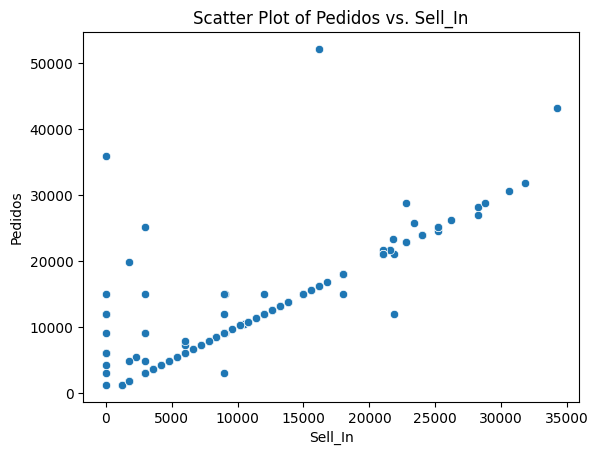

Correlation between Pedidos and Sell_In: 0.83


In [ ]:
# Assuming your DataFrame is named 'df'
# Select the relevant columns
pedidos_sellin = df[["Pedidos", "Sell_In"]]

# Create a scatter plot
sns.scatterplot(x="Sell_In", y="Pedidos", data=pedidos_sellin)
plt.title("Scatter Plot of Pedidos vs. Sell_In")
plt.xlabel("Sell_In")
plt.ylabel("Pedidos")
plt.show()

# Calculate the correlation coefficient
correlation = pedidos_sellin["Pedidos"].corr(pedidos_sellin["Sell_In"])
print(f"Correlation between Pedidos and Sell_In: {correlation:.2f}")

In [ ]:
# Definir los datos de la tabla de variables con mayor correlación
data_mayor_correlacion = {
    "Variable": [
        "Sell_In",
        "Sell_in_on_time",
        "CEDIS",
        "_Tuesday",
        "Promedio_dia_Sell_Out_Cliente",
        "Tiendas",
        "Sell_in_rezago",
    ],
    "Correlación con Pedidos": [0.826, 0.696, 0.539, 0.291, 0.230, 0.215, 0.201],
    "Interpretación": [
        "Mayor sell-in genera más pedidos.",
        "Cumplimiento on-time mejora la generación de pedidos.",
        "Más CEDIS pueden facilitar más pedidos.",
        "Los martes parecen tener más pedidos.",
        "Si el cliente vende más por día, los pedidos pueden aumentar.",
        "Más tiendas pueden generar más pedidos.",
        "El rezago en el sell-in tiene una leve relación con los pedidos.",
    ],
}


# Crear DataFrames
df_mayor_correlacion = pd.DataFrame(data_mayor_correlacion)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
# Mostrar las tablas en Jupyter Notebook o Google Colab
display(df_mayor_correlacion)

Variable  Correlación con Pedidos  \
0                        Sell_In                    0.826   
1                Sell_in_on_time                    0.696   
2                          CEDIS                    0.539   
3                       _Tuesday                    0.291   
4  Promedio_dia_Sell_Out_Cliente                    0.230   
5                        Tiendas                    0.215   
6                 Sell_in_rezago                    0.201   

                                                     Interpretación  
0                                 Mayor sell-in genera más pedidos.  
1             Cumplimiento on-time mejora la generación de pedidos.  
2                           Más CEDIS pueden facilitar más pedidos.  
3                             Los martes parecen tener más pedidos.  
4     Si el cliente vende más por día, los pedidos pueden aumentar.  
5                           Más tiendas pueden generar más pedidos.  
6  El rezago en el sell-in tiene una leve relación con los pedidos.

In [ ]:
# Definir los datos de la tabla de variables con menor influencia
# Assuming you want to create a DataFrame for variables with menor influencia
# You need to define the data for it, similar to data_mayor_correlacion
data_menor_influencia = {
    "Variable": [
        "_Monday",
        "__Saturday",
        "__Sunday",
        "__Thursday",
        "__Wednesday",
        "Es festivo",
        "Cerca de quincena",
        "Temporada Escolar",
        "Mes_Año",
    ],
    "Correlación con Pedidos": [
        0.000,
        -0.003,
        -0.004,
        -0.021,
        -0.032,
        -0.062,
        -0.079,
        -0.119,
        -0.177,
    ],
    "Interpretación": [
        "Los lunes parecen no tener un impacto significativo en los pedidos.",
        "Los sábados parecen no tener un impacto significativo en los pedidos.",
        "Los domingos parecen no tener un impacto significativo en los pedidos.",
        "Los jueves parecen no tener un impacto significativo en los pedidos.",
        "Los miércoles parecen no tener un impacto significativo en los pedidos.",
        "Los días festivos parecen no tener un impacto significativo en los pedidos.",
        "La cercanía a la quincena parece no tener un impacto significativo en los pedidos.",
        "La temporada escolar parece no tener un impacto significativo en los pedidos.",
        "El mes del año parece no tener un impacto significativo en los pedidos.",
    ],
}

# Crear DataFrames
df_menor_influencia = pd.DataFrame(data_menor_influencia)

# Mostrar las tablas en Jupyter Notebook o Google Colab
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
display(df_menor_influencia)

Variable  Correlación con Pedidos  \
0            _Monday                    0.000   
1         __Saturday                   -0.003   
2           __Sunday                   -0.004   
3         __Thursday                   -0.021   
4        __Wednesday                   -0.032   
5         Es festivo                   -0.062   
6  Cerca de quincena                   -0.079   
7  Temporada Escolar                   -0.119   
8            Mes_Año                   -0.177   

                                                                       Interpretación  
0                 Los lunes parecen no tener un impacto significativo en los pedidos.  
1               Los sábados parecen no tener un impacto significativo en los pedidos.  
2              Los domingos parecen no tener un impacto significativo en los pedidos.  
3                Los jueves parecen no tener un impacto significativo en los pedidos.  
4             Los miércoles parecen no tener un impacto significativo en los pedidos.  
5         Los días festivos parecen no tener un impacto significativo en los pedidos.  
6  La cercanía a la quincena parece no tener un impacto significativo en los pedidos.  
7       La temporada escolar parece no tener un impacto significativo en los pedidos.  
8             El mes del año parece no tener un impacto significativo en los pedidos.

# **CONCLUSIÓN ANALISIS BIVARIADO**

Las tres variables más influyentes en los pedidos son Sell_In, Sell_in_on_time y CEDIS. Esto sugiere que los pedidos están altamente relacionados con la cantidad de producto enviado y su puntualidad.

Las variables quincena, temporada escolar, festivos y día de la semana (excepto martes) tienen un impacto muy bajo en los pedidos. Esto sugiere que los pedidos no varían fuertemente según estas categorías.

A pesar de que usaron otros coeficientes de correlación como Kendall y Spearman, las variables que daban cero en su correlación con Pearson, no presentaron ningun cambio significativo como para ser tenidas en cuenta.


# **PRÓXIMOS PASOS**

🔹 1. Construir un Modelo de Predicción de Pedidos

Utilizar Sell_In, Sell_in_on_time y CEDIS como variables principales en un modelo de regresión o machine learning.

🔹 2. Análisis Temporal Más Profundo

Si bien la quincena y temporada escolar tienen baja correlación, puede ser útil hacer un análisis por segmentos (ejemplo: analizar solo ciertos productos).

🔹 3. Evaluar si hay factores ocultos

Algunas variables con baja correlación podrían tener un efecto indirecto sobre los pedidos. Se puede probar con técnicas como modelos no lineales (árboles de decisión o XGBoost).


# **APLICACION DE MODELOS DE APRENDIZAJE SUPERVISADO**

<div style="text-align: justify;">

</div>

1️⃣ Regresión Lineal Múltiple:


*   Fácil de interpretar y nos da una línea base para comparación.
*   Permite evaluar qué variables son más relevantes y su impacto en la demanda
*   Permite evaluar qué variables son más relevantes y su impacto en la demanda.Funciona bien si la relación entre las variables es aproximadamente lineal.


2️⃣ Random Forest:


*   Captura relaciones no lineales y interacciones entre variables.
*   Es robusto ante datos ruidosos y no se ve afectado por multicolinealidad.
*   Puede manejar grandes volúmenes de datos sin perder precisión.
*   Esto es útil cuando las relaciones entre variables no son evidentes con una regresión tradicional.



3️⃣ XGBoost

*   Es más preciso que Random Forest en muchos casos, ya que usa boosting para mejorar cada predicción.
*   Es rápido y eficiente, ideal para grandes volúmenes de datos.
*   Soporta manejo de valores nulos y desequilibrio de datos.
*   Si la demanda de ciertos SKUs sigue un patrón muy irregular, XGBoost puede detectar dependencias sutiles entre las variables.



# **Sin Optimizar Parámetros**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_absolute_error,
    mean_squared_error,
)
from google.colab import files

# Convertir fecha a datetime y ordenar datos
df["Fe.prefer.entrega"] = pd.to_datetime(df["Fe.prefer.entrega"])
df = df.sort_values(by=["SKU", "Fe.prefer.entrega"])

# Crear lags para Pedidos, Sell_In, CEDIS y porcentaje_on_time
lags = [1, 2, 7, 14, 30]
for lag in lags:
    df[f"Pedidos_t-{lag}"] = df.groupby("SKU")["Pedidos"].shift(lag)
    df[f"Sell_In_t-{lag}"] = df.groupby("SKU")["Sell_In"].shift(lag)
    df[f"CEDIS_t-{lag}"] = df.groupby("SKU")["CEDIS"].shift(lag)
    df[f"porcentaje_on_time_t-{lag}"] = df.groupby("SKU")["porcentaje_on_time"].shift(
        lag
    )

# Crear promedios móviles
df["Pedidos_MA_7"] = (
    df.groupby("SKU")["Pedidos"]
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)
df["Pedidos_MA_30"] = (
    df.groupby("SKU")["Pedidos"]
    .rolling(window=30, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# Rellenar valores NaN en lags y promedios móviles
df.bfill(inplace=True)  # Rellenar hacia adelante si hay valores NaN

# Seleccionar características
features = (
    [f"Pedidos_t-{lag}" for lag in lags]
    + [f"Sell_In_t-{lag}" for lag in lags]
    + [f"CEDIS_t-{lag}" for lag in lags]
    + [f"porcentaje_on_time_t-{lag}" for lag in lags]
    + [
        "Pedidos_MA_7",
        "Pedidos_MA_30",
        "Es festivo",
        "Cerca de quincena",
        "Temporada Escolar",
        "__Monday",
        "__Saturday",
        "__Sunday",
        "__Thursday",
        "__Tuesday",
        "__Wednesday",
    ]
)

X = df[features]
y = df["Pedidos"]

# Verificar la cantidad de datos antes de dividir
print(f"Total de filas después del preprocesamiento: {X.shape[0]}")

# Ajustar test_size dinámicamente si hay pocos datos
test_size = 7 if X.shape[0] > 14 else max(1, int(0.2 * X.shape[0]))
print(f"Usando test_size={test_size}")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Función para calcular SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    )


# Función para calcular WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)


# Función para evaluar modelos
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    metrics = {}

    models = {
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(
            n_estimators=100, learning_rate=0.1, random_state=42
        ),
        "Regresión Múltiple": LinearRegression(),
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = np.sqrt(mean_squared_error(y_test, y_pred))
        metrics[name] = {
            "MAPE": mean_absolute_percentage_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "SMAPE": smape(y_test, y_pred),
            "WMAPE": wmape(y_test, y_pred),
        }

    return results, metrics


# Evaluar modelos y seleccionar el mejor
model_results, model_metrics = evaluate_models(X_train, X_test, y_train, y_test)
best_model = min(model_results, key=model_results.get)
best_mape = model_results[best_model]

# Entrenar el mejor modelo
final_model = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Regresión Múltiple": LinearRegression(),
}[best_model]

final_model.fit(X_train, y_train)

# Generar pronóstico para los próximos 7 días
future_dates = pd.date_range(
    start=df["Fe.prefer.entrega"].max() + pd.Timedelta(days=1), periods=7, freq="D"
)
predictions = final_model.predict(X_test[-7:])

forecast_df = pd.DataFrame({"Fecha": future_dates, "Pronostico": predictions})
forecast_df.to_excel("pronostico_7_dias.xlsx", index=False)
files.download("pronostico_7_dias.xlsx")

# Mostrar todas las métricas
print("\n📊 Comparación de Modelos:")
for model, metrics in model_metrics.items():
    print(f"\n🔹 {model}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

print(f"\n🏆 Mejor modelo: {best_model} (RMSE: {best_mape:.4f})")

Total de filas después del preprocesamiento: 238
Usando test_size=7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Comparación de Modelos:

🔹 Random Forest
  MAPE: 1.4521
  MAE: 5122.9714
  RMSE: 5907.1874
  SMAPE: 52.6516
  WMAPE: 0.4494

🔹 XGBoost
  MAPE: 1.6928
  MAE: 7060.0435
  RMSE: 8154.2826
  SMAPE: 64.9807
  WMAPE: 0.6193

🔹 Regresión Múltiple
  MAPE: 1.1960
  MAE: 6337.5086
  RMSE: 7356.0080
  SMAPE: 61.0278
  WMAPE: 0.5559

🏆 Mejor modelo: Random Forest (RMSE: 5907.1874)


In [ ]:
resultados = evaluate_models(
    X_train, X_test, y_train, y_test
)  # Sin Optimizar Parametros
print(resultados)

({'Random Forest': np.float64(5907.187406154351), 'XGBoost': np.float64(8154.282555810781), 'Regresión Múltiple': np.float64(7356.007961257526)}, {'Random Forest': {'MAPE': 1.45213343470483, 'MAE': 5122.971428571428, 'RMSE': np.float64(5907.187406154351), 'SMAPE': np.float64(52.65161816541233), 'WMAPE': np.float64(0.4493834586466165)}, 'XGBoost': {'MAPE': 1.6927505731582642, 'MAE': 7060.04345703125, 'RMSE': np.float64(8154.282555810781), 'SMAPE': np.float64(64.98065908023732), 'WMAPE': np.float64(0.6193020392778822)}, 'Regresión Múltiple': {'MAPE': 1.1960374179909743, 'MAE': 6337.50855118231, 'RMSE': np.float64(7356.007961257526), 'SMAPE': np.float64(61.02783296791227), 'WMAPE': np.float64(0.5559218027352903)}})


## Grafica del mejor modelo de regresión

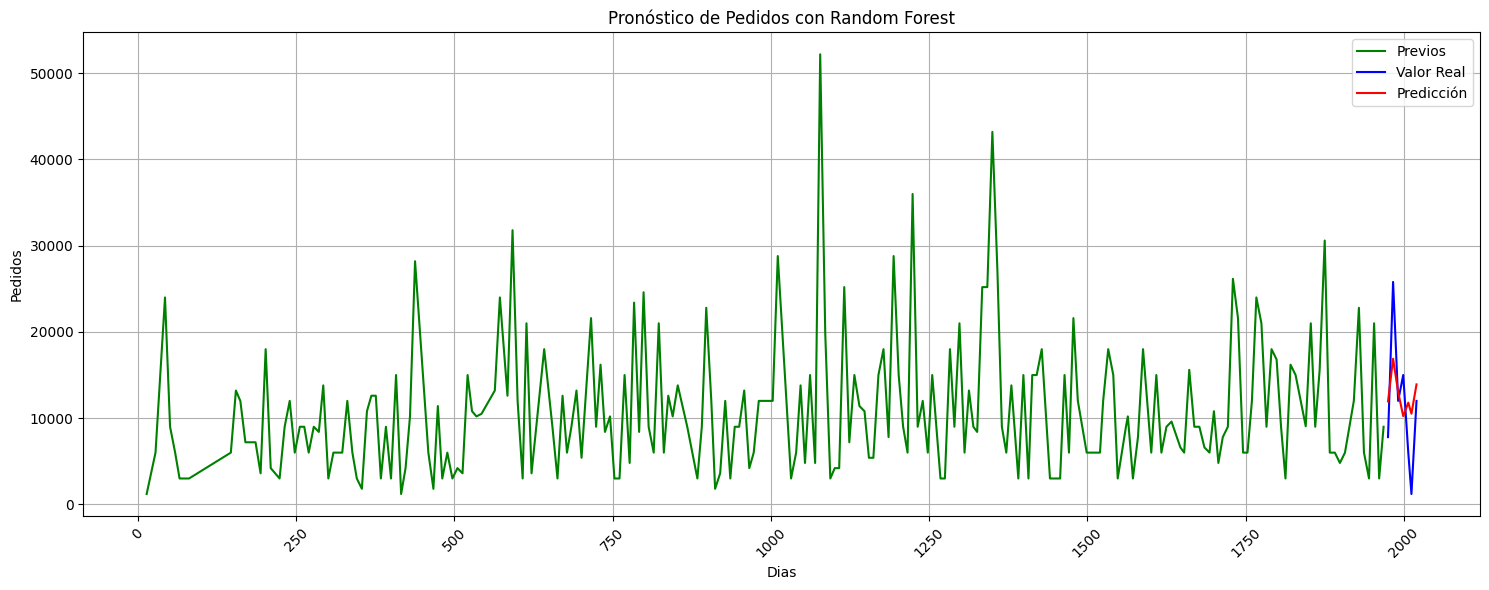

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train.values, label="Previos", color="green")
plt.plot(y_test.index, y_test.values, label="Valor Real", color="blue")
plt.plot(y_test.index, final_model.predict(X_test), label="Predicción", color="red")

plt.xlabel("Dias")
plt.ylabel("Pedidos")
plt.title(f"Pronóstico de Pedidos con {best_model}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Optimizando Parámetros**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_absolute_error,
    mean_squared_error,
)
from google.colab import files


# Convertir fecha a datetime y ordenar datos
df["Fe.prefer.entrega"] = pd.to_datetime(df["Fe.prefer.entrega"])
df = df.sort_values(by=["SKU", "Fe.prefer.entrega"])

# Crear lags para Pedidos, Sell_In, CEDIS y porcentaje_on_time
lags = [1, 2, 7, 14, 30]
for lag in lags:
    df[f"Pedidos_t-{lag}"] = df.groupby("SKU")["Pedidos"].shift(lag)
    df[f"Sell_In_t-{lag}"] = df.groupby("SKU")["Sell_In"].shift(lag)
    df[f"CEDIS_t-{lag}"] = df.groupby("SKU")["CEDIS"].shift(lag)
    df[f"porcentaje_on_time_t-{lag}"] = df.groupby("SKU")["porcentaje_on_time"].shift(
        lag
    )

# Crear promedios móviles
df["Pedidos_MA_7"] = (
    df.groupby("SKU")["Pedidos"]
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)
df["Pedidos_MA_30"] = (
    df.groupby("SKU")["Pedidos"]
    .rolling(window=30, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# Rellenar valores NaN en lags y promedios móviles
df.bfill(inplace=True)  # Rellenar hacia adelante si hay valores NaN

# Seleccionar características
features = (
    [f"Pedidos_t-{lag}" for lag in lags]
    + [f"Sell_In_t-{lag}" for lag in lags]
    + [f"CEDIS_t-{lag}" for lag in lags]
    + [f"porcentaje_on_time_t-{lag}" for lag in lags]
    + [
        "Pedidos_MA_7",
        "Pedidos_MA_30",
        "Es festivo",
        "Cerca de quincena",
        "Temporada Escolar",
        "__Monday",
        "__Saturday",
        "__Sunday",
        "__Thursday",
        "__Tuesday",
        "__Wednesday",
    ]
)

X = df[features]
y = df["Pedidos"]

# Dividir datos en entrenamiento y prueba (últimos 7 días para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7, shuffle=False)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Función para calcular SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    )


# Función para calcular WMAPE
def wmape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)


# Optimización de hiperparámetros
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
}

rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1,
)
rf.fit(X_train, y_train)
best_rf = rf.best_estimator_

xgb_model = GridSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_grid_xgb,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1,
)
xgb_model.fit(X_train, y_train)
best_xgb = xgb_model.best_estimator_


# Función para evaluar modelos
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}
    metrics = {}

    models = {
        "Random Forest": best_rf,
        "XGBoost": best_xgb,
        "Regresión Múltiple": LinearRegression(),
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = np.sqrt(mean_squared_error(y_test, y_pred))
        metrics[name] = {
            "MAPE": mean_absolute_percentage_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "SMAPE": smape(y_test, y_pred),
            "WMAPE": wmape(y_test, y_pred),
        }

    return results, metrics


# Evaluar modelos y seleccionar el mejor
model_results, model_metrics = evaluate_models(X_train, X_test, y_train, y_test)
best_model = min(model_results, key=model_results.get)
best_mape = model_results[best_model]

# Entrenar el mejor modelo
final_model = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Regresión Múltiple": LinearRegression(),
}[best_model]

final_model.fit(X_train, y_train)

# Generar pronóstico para los próximos 7 días
future_dates = pd.date_range(
    start=df["Fe.prefer.entrega"].max() + pd.Timedelta(days=1), periods=7, freq="D"
)
predictions = final_model.predict(X_test[-7:])

forecast_df = pd.DataFrame({"Fecha": future_dates, "Pronostico": predictions})
forecast_df.to_excel("pronostico_7_dias.xlsx", index=False)
files.download("pronostico_7_dias.xlsx")

# Mostrar todas las métricas
print("\n📊 Comparación de Modelos:")
for model, metrics in model_metrics.items():
    print(f"\n🔹 {model}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

print(f"\n🏆 Mejor modelo: {best_model} (RMSE: {best_mape:.4f})")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Comparación de Modelos:

🔹 Random Forest
  MAPE: 1.4938
  MAE: 5479.4785
  RMSE: 6443.4801
  SMAPE: 54.5457
  WMAPE: 0.4807

🔹 XGBoost
  MAPE: 1.4595
  MAE: 5352.8442
  RMSE: 6675.8544
  SMAPE: 53.5225
  WMAPE: 0.4695

🔹 Regresión Múltiple
  MAPE: 1.1960
  MAE: 6337.5086
  RMSE: 7356.0080
  SMAPE: 61.0278
  WMAPE: 0.5559

🏆 Mejor modelo: Random Forest (RMSE: 6443.4801)


## Grafica del mejor modelo de regresión optimizando parametros

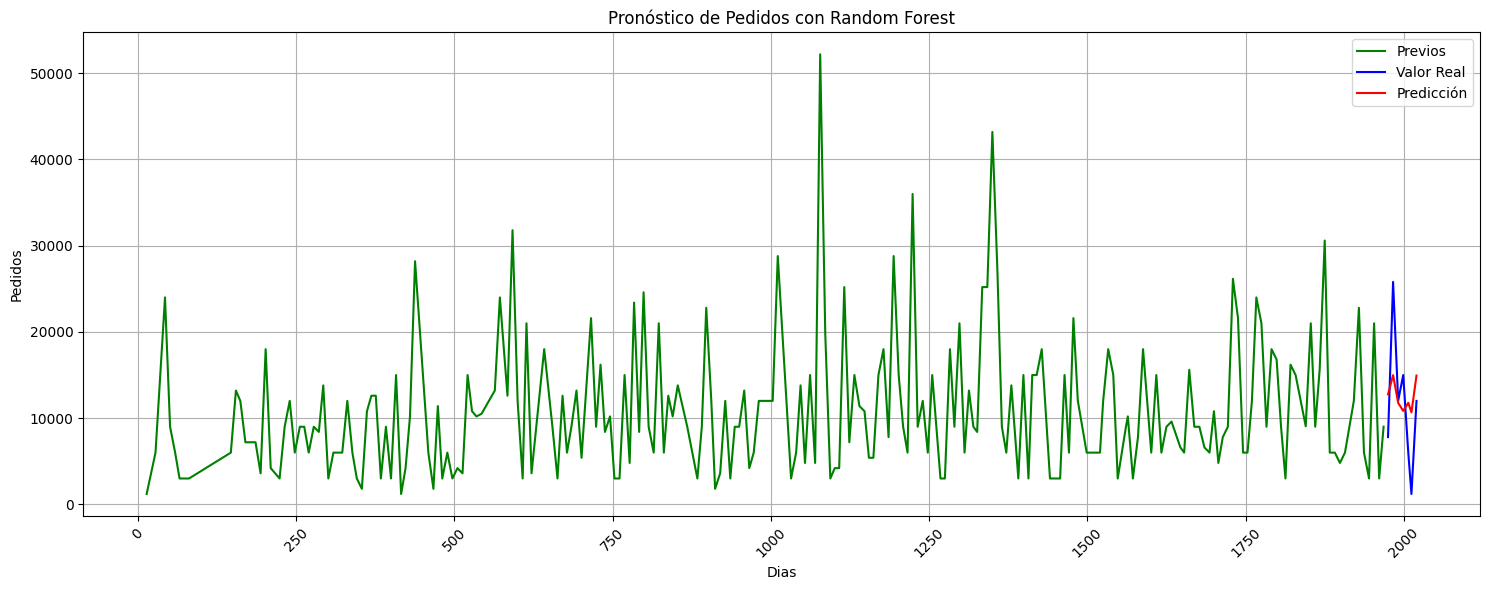

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train.values, label="Previos", color="green")
plt.plot(y_test.index, y_test.values, label="Valor Real", color="blue")
plt.plot(y_test.index, predictions, label="Predicción", color="red")

plt.xlabel("Dias")
plt.ylabel("Pedidos")
plt.title(f"Pronóstico de Pedidos con {best_model}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **APLICACION DE MODELOS DE SERIES DE TIEMPO**

1️⃣ ARIMA (AutoRegressive Integrated Moving Average)

*   Captura tendencias y patrones a largo plazo sin necesidad de variables adicionales.
*   Útil cuando la demanda es estacionaria o se puede transformar en estacionaria mediante diferenciación.
*   Se basa en valores pasados de la demanda (autoregresión) y en errores previos del modelo.

2️⃣ SARIMA (Seasonal ARIMA)

*   Extiende ARIMA para manejar estacionalidad (picos de demanda en ciertos periodos).
*   Adecuado cuando la demanda tiene patrones cíclicos regulares (ej. aumentos en quincenas, fin de mes, temporadas escolares).


3️⃣ Prophet (de Facebook)

Automatiza la detección de tendencias y estacionalidades sin necesidad de

*   Automatiza la detección de tendencias y estacionalidades sin necesidad de especificar manualmente los parámetros.
*   Maneja vacíos en los datos y cambios abruptos en la tendencia (rupturas de stock, cambios de mercado).
*   Permite agregar variables externas (eventos especiales, festividades, promociones).


4️⃣ VAR (Vector AutoRegressive Model)

*   A diferencia de los modelos anteriores, VAR modela múltiples series temporales a la vez.
*   Nos permite incluir factores externos como precio, stock, promociones, ventas de otros SKUs.
*   Captura relaciones entre múltiples variables, no solo la demanda pasada.








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_absolute_error,
    mean_squared_error,
)
from google.colab import files

# Convertir fecha a datetime y ordenar datos
df["Fe.prefer.entrega"] = pd.to_datetime(df["Fe.prefer.entrega"])
df = df.sort_values(by=["Fe.prefer.entrega"])

# Seleccionar variables relevantes para VAR (series de tiempo multivariadas)
variables = ["Pedidos", "Sell_In", "CEDIS", "porcentaje_on_time"]
df_var = df[["Fe.prefer.entrega"] + variables].set_index("Fe.prefer.entrega").dropna()

# Seleccionar solo la columna de fecha y pedidos para otros modelos
df_ts = df[["Fe.prefer.entrega", "Pedidos"]].set_index("Fe.prefer.entrega")

# Dividir datos en entrenamiento y prueba (últimos 7 días para prueba)
train_size = int(len(df_ts) * 0.8)
train, test = df_ts.iloc[:train_size], df_ts.iloc[train_size:]
train_var, test_var = df_var.iloc[:train_size], df_var.iloc[train_size:]


# Función para evaluar modelos
def evaluate_forecast(y_true, y_pred):
    return {
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "WMAPE": (
            np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)
            if np.sum(y_true) != 0
            else np.nan
        ),
    }


# Modelo ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test))
arima_results = evaluate_forecast(test.values.flatten(), arima_pred.values)

# Modelo SARIMA
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit()
sarima_pred = sarima_fit.forecast(steps=len(test))
sarima_results = evaluate_forecast(test.values.flatten(), sarima_pred.values)

# Modelo Prophet
df_prophet = df_ts.reset_index().rename(
    columns={"Fe.prefer.entrega": "ds", "Pedidos": "y"}
)
prophet = Prophet()
prophet.fit(df_prophet.iloc[:train_size])
future = prophet.make_future_dataframe(periods=len(test))
prophet_pred = prophet.predict(future)["yhat"].iloc[-len(test) :]
prophet_results = evaluate_forecast(test.values.flatten(), prophet_pred.values)

# Modelo VAR
var_model = VAR(train_var)
var_fit = var_model.fit()
var_pred = var_fit.forecast(train_var.values[-var_fit.k_ar :], steps=len(test_var))
var_pred_df = pd.DataFrame(var_pred, index=test_var.index, columns=train_var.columns)
var_results = evaluate_forecast(
    test_var["Pedidos"].values.flatten(), var_pred_df["Pedidos"].values.flatten()
)

# Comparación de modelos
model_results = {
    "ARIMA": arima_results,
    "SARIMA": sarima_results,
    "Prophet": prophet_results,
    "VAR": var_results,
}

print("\n📊 Comparación de Modelos de Series de Tiempo:")
for model, metrics in model_results.items():
    print(f"\n🔹 {model}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

# Seleccionar el mejor modelo basado en MAPE
best_model = min(model_results, key=lambda x: model_results[x]["MAPE"])
print(f"\n🏆 Mejor modelo: {best_model}")

# Generar pronóstico para los próximos 7 días
future_dates = pd.date_range(
    start=df_ts.index.max() + pd.Timedelta(days=1), periods=7, freq="D"
)
if best_model == "ARIMA":
    forecast_values = arima_fit.forecast(steps=7)
elif best_model == "SARIMA":
    forecast_values = sarima_fit.forecast(steps=7)
elif best_model == "Prophet":
    future_df = prophet.make_future_dataframe(periods=7)
    forecast_values = prophet.predict(future_df)["yhat"].iloc[-7:]
elif best_model == "VAR":
    var_forecast = var_fit.forecast(train_var.values[-var_fit.k_ar :], steps=7)
    forecast_values = pd.DataFrame(var_forecast, columns=train_var.columns)["Pedidos"]

forecast_df = pd.DataFrame(
    {"Fecha": future_dates, "Pronostico": forecast_values.values}
)
forecast_df.to_excel("pronostico_7_dias.xlsx", index=False)
files.download("pronostico_7_dias.xlsx")

print("\n✅ Pronóstico generado y listo para descargar en 'pronostico_7_dias.xlsx'")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


📊 Comparación de Modelos de Series de Tiempo:

🔹 ARIMA
  MAPE: 0.5498
  MAE: 5925.6624
  RMSE: 8266.5234
  WMAPE: 0.5007

🔹 SARIMA
  MAPE: 0.9936
  MAE: 6530.9901
  RMSE: 7540.9266
  WMAPE: 0.5519

🔹 Prophet
  MAPE: 0.8709
  MAE: 5525.8231
  RMSE: 6429.5362
  WMAPE: 0.4670

🔹 VAR
  MAPE: 0.7273
  MAE: 5571.0032
  RMSE: 7080.6976
  WMAPE: 0.4708

🏆 Mejor modelo: ARIMA


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Pronóstico generado y listo para descargar en 'pronostico_7_dias.xlsx'


## Grafica del mejor modelo

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


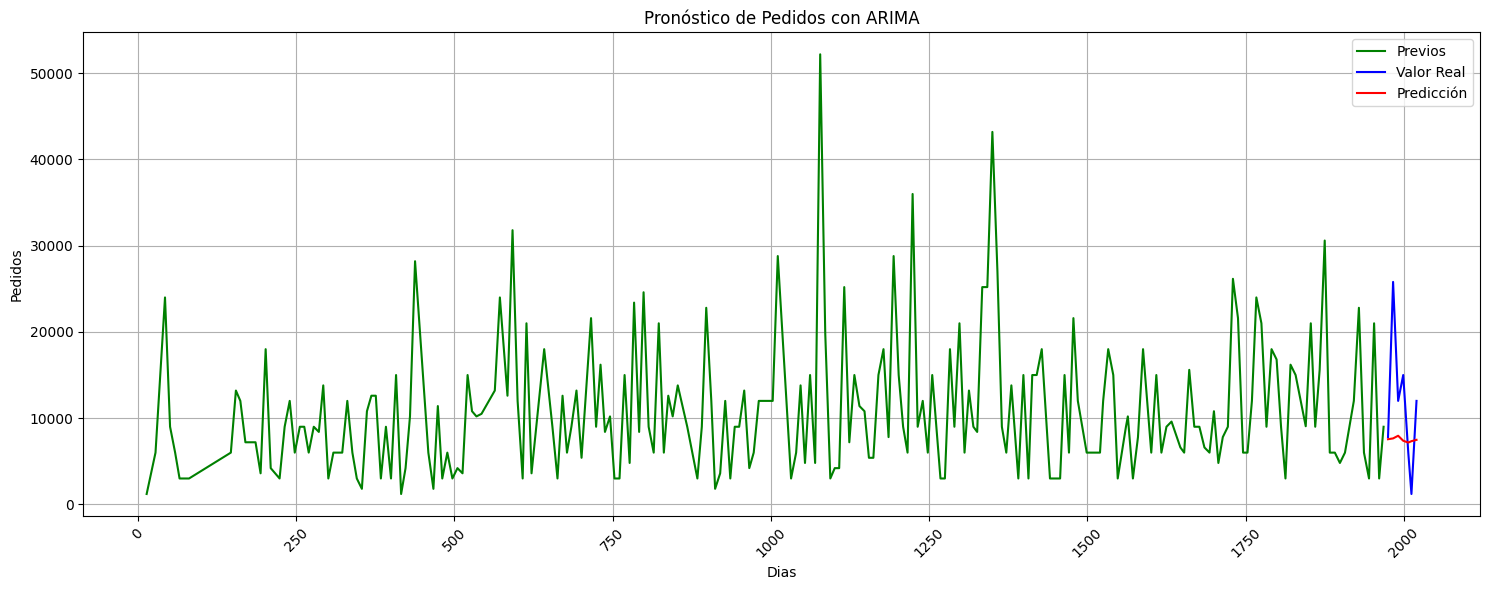

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train.values, label="Previos", color="green")
plt.plot(y_test.index, y_test.values, label="Valor Real", color="blue")
plt.plot(y_test.index, arima_fit.forecast(steps=7), label="Predicción", color="red")

plt.xlabel("Dias")
plt.ylabel("Pedidos")
plt.title(f"Pronóstico de Pedidos con {best_model}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **CONCLUSIONES**

Durante el análisis univariado identificamos patrones de demanda con picos significativos que complican la serialización de los datos. Posteriormente, mediante el análisis bivariado, determinamos que factores como días festivos, quincenas o temporada escolar presentan baja correlación con los pedidos, lo que invalidó nuestra hipótesis inicial sobre su influencia en los cambios de demanda.

En la fase de modelado, el algoritmo Random Forest demostró ser el más efectivo para capturar los patrones de pedidos, aunque persisten oportunidades de mejora en la capacidad del modelo para ampliar la predicción de picos de demanda, que actualmente se mantienen en un rango más conservador.

Finalmente, el objetivo final era mejorar la precisión semanal (actualmente tenemos un MAPE 35%), el modelo propuesto alcanza un 8% de precisión, lo que sugiere la necesidad de ajustes adicionales para optimizar su desempeño en este aspecto crítico.

# **PRUEBA REAL Y RECOMENDACIONES**

Se probó el modelo durante 7 días equivalentes a una semana completa con el objetivo de evaluar su rendimiento. Actualmente el error de prónostico medido con la métrica MAPE resulta tener un promedio del 35-40 % para el SKU seleccionado. Sin embargo, usando el módelo Random Forest, se puede observar que al mejorar la precisión dia a dia, podemos reducir el error semanal a un 8%. Se sugiere seguir probando el modelo durante los siguientes meses con el fin de añadir mas información y que pueda capturar de mejor forma los patrones de compra del cliente. Si hablamos de que de 100 productos en ordenes de compra, se pronosticaron 65, estariamos hablando de 35 SKU que no se pudieron entregar, si cada SKU cuesta 10.000 COP, entonces se perdió venta por $350.000.

Sin embargo, usando Random Forest, la perdida sería solamente de 8*10.000 = $80.000, es decir, una reducción del 77%. Este analisis nos permite dimensionar a una escala mayor, durante mas días y considerando todo el portafolio de productos que las ganancias y/o ahorro para la compañia seria muy significativo.

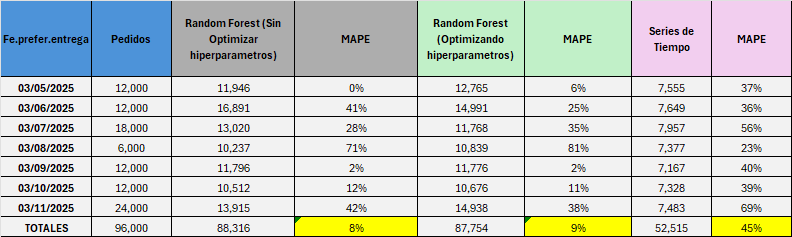

